# Data analysis of NetsurfP training datasets

First of all, the sequence lengths of the datasets are inspected, since the ESM1b embeddings works best with residue sequences that are below 1024 and 500.

**Loading of libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Loading dataset(s)

In [2]:
hhblits = np.load('/home/eryk/development/NSPThesis/data/nsp2/training_data/Train_HHblits.npz')['data']
casp12 = np.load('/home/eryk/development/NSPThesis/data/nsp2/training_data/CASP12_HHblits.npz')['data']
cb513 = np.load('/home/eryk/development/NSPThesis/data/nsp2/training_data/CB513_HHblits.npz')['data']
ts115 = np.load('/home/eryk/development/NSPThesis/data/nsp2/training_data/TS115_HHblits.npz')['data']

## Sequence length distribution

Count the sequences and then plot the distribution as a histogram

In [309]:
def count_sequences(data):
    """Counts the sequences in given data"""
    hist = {}
    for seq in data:
        idx = sum(seq)
        hist[idx] = hist.get(idx, 0) + 1
    return hist

Plot training data

In [327]:
# Plot hhblits
def count_sequences(data):
    """Counts the sequences in given data"""
    hist = {}
    for seq in data:
        idx = sum(seq)
        hist[idx] = hist.get(idx, 0) + 1
    return hist

def plot_count_sequences(dataset, name):
    plt.style.use(['science', 'ieee'])

    count = count_sequences(dataset[:, :, 50])

    plt.rcParams["figure.figsize"]=(3, 2)
    n, bins, patches = plt.hist(x=count, bins='auto')
    plt.xlabel('$Sequence$ $length$')
    plt.ylabel('$n$')
    #plt.title('Train sequence length distribution')
    #plt.axvline(x=1024, label='ESM1b limit', c='y')
    #plt.axvline(x=500, label='Uniform', c='r')
    #plt.legend(loc='upper right')
    plt.savefig(name)
    plt.show()

Plot training count data

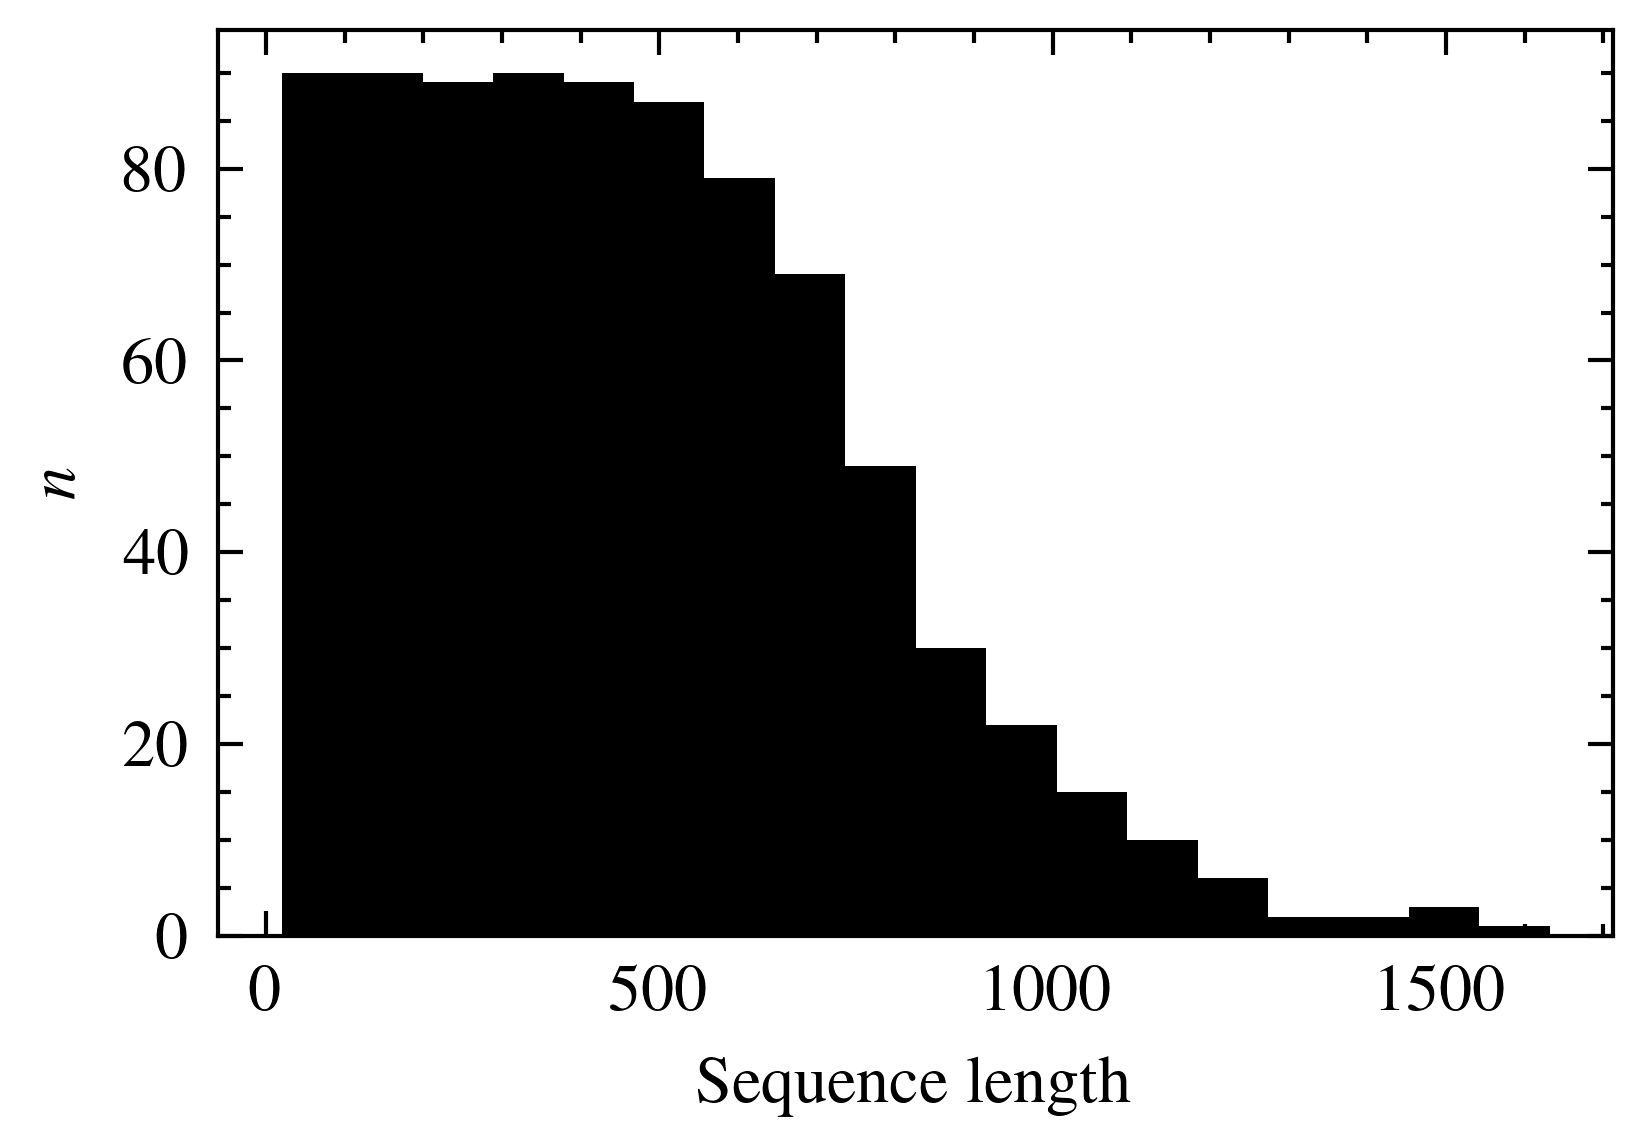

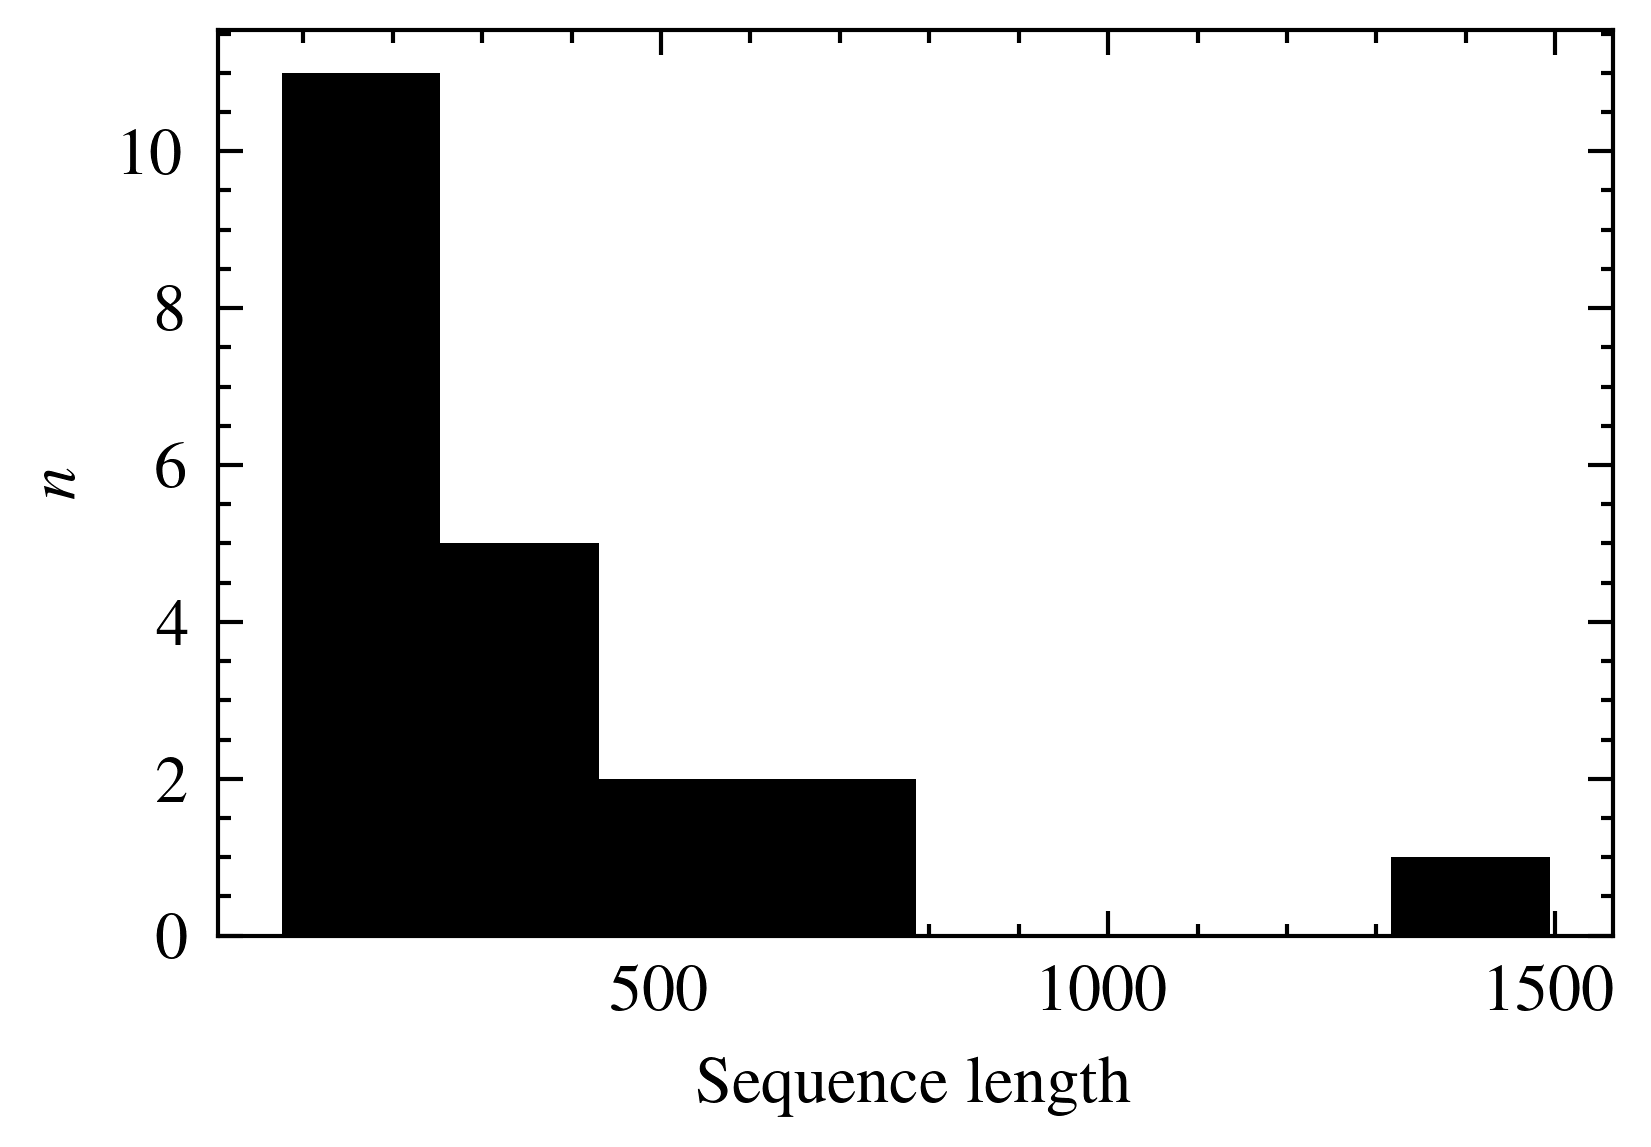

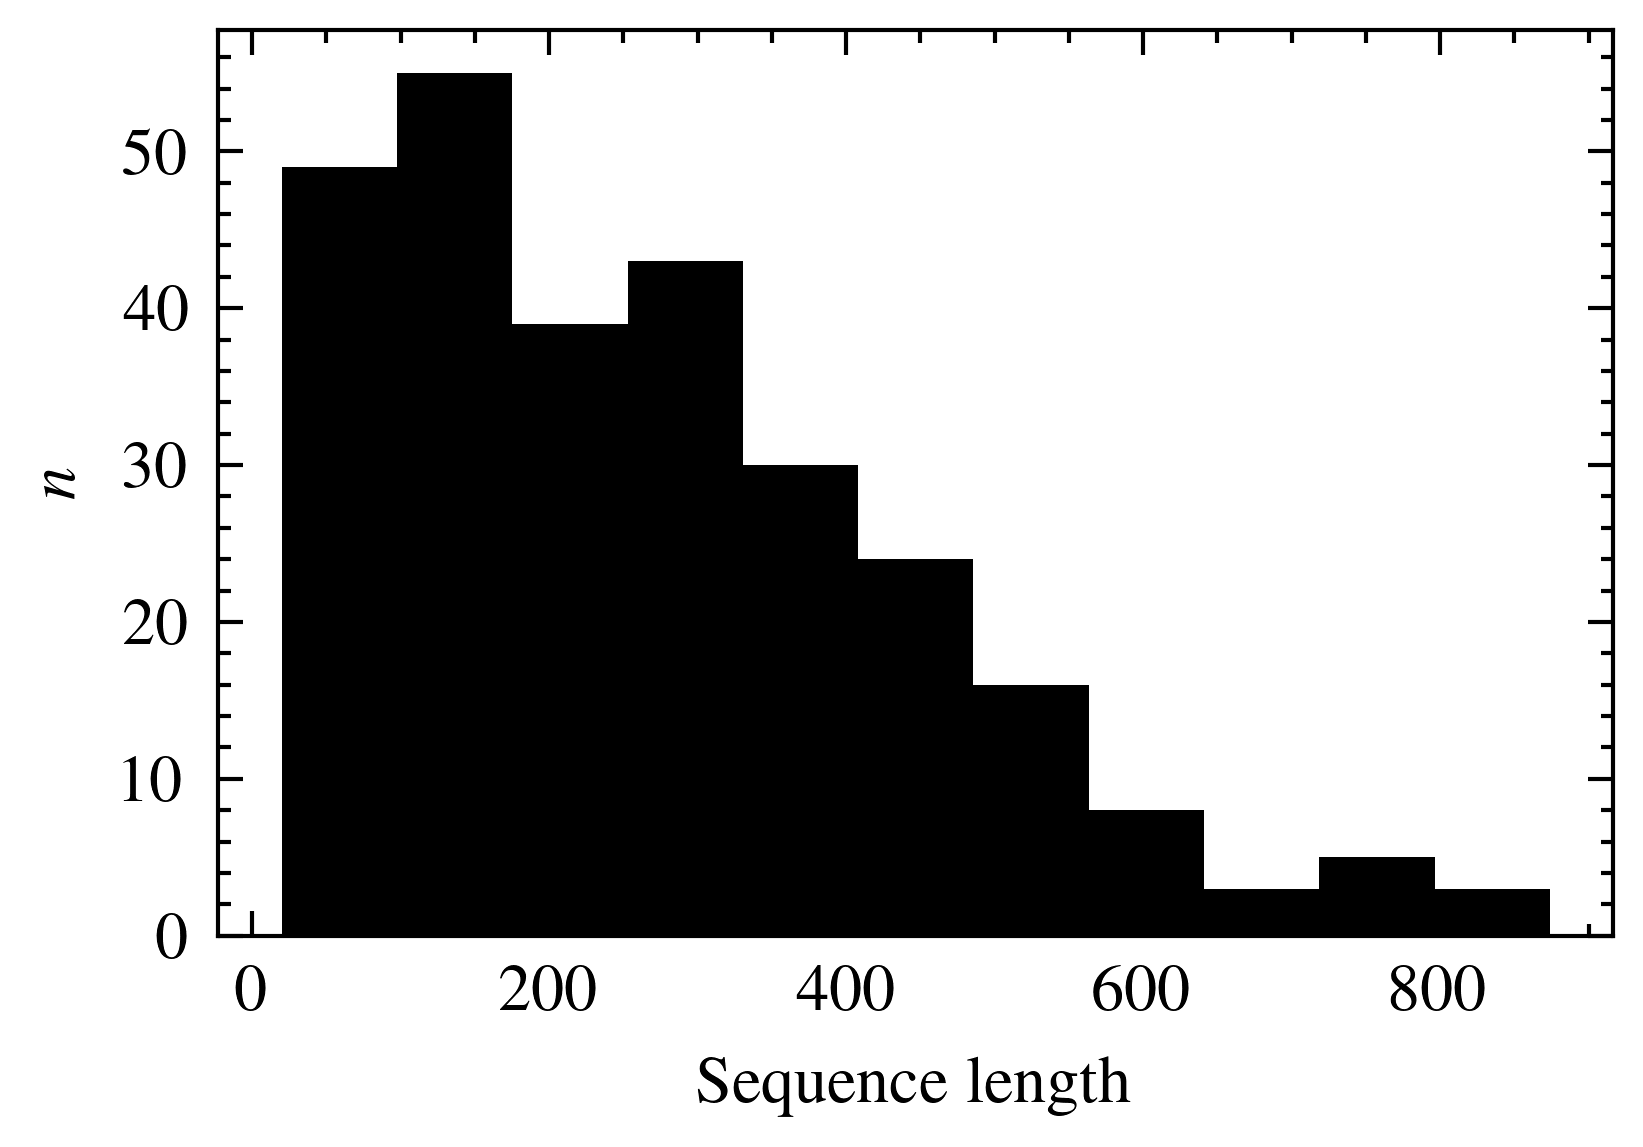

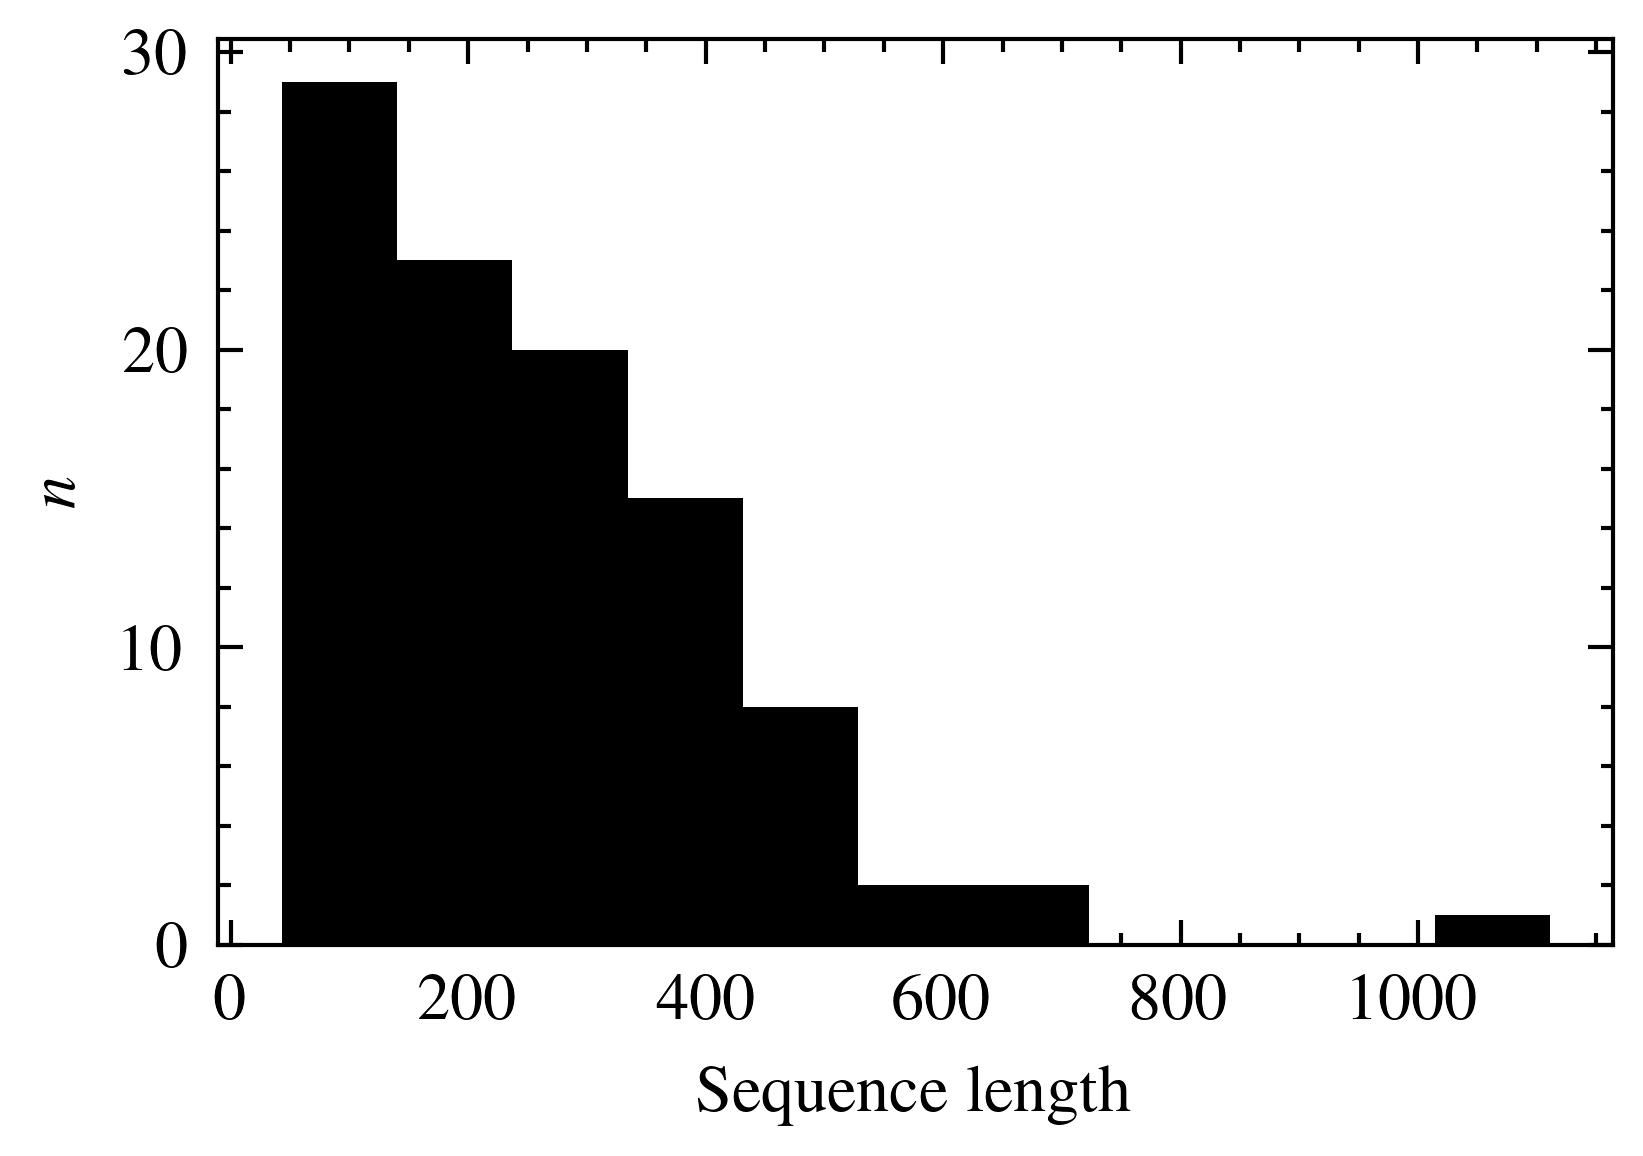

In [328]:
plot_count_sequences(hhblits, "plots/sequence_len_train")
plot_count_sequences(casp12, "plots/sequence_len_casp12_train")
plot_count_sequences(cb513, "plots/sequence_len_cb513_train")
plot_count_sequences(ts115, "plots/sequence_len_ts115_train")

# Distribution of secondary structure and disorder

## Secondary structure

Count the classes in the train data

In [338]:
def plot_ss(dataset, name):
    mask = dataset[:, :, 50]== 1
    q8 = np.argmax(dataset[:, :, 57:65], axis=2)[mask]
    q8 = np.array(["GHIBESTC"[int(r)] for r in q8.flatten()])
    unique, counts = np.unique(q8, return_counts=True)
    
    with plt.style.context(['science', 'ieee']):
        plt.bar(unique, counts, align='center')
        plt.ylabel('$n$')
        plt.gca().set_xticks(unique)
        plt.xlabel('$Classes$')
        plt.savefig(name)
        plt.show()

Plot the classes

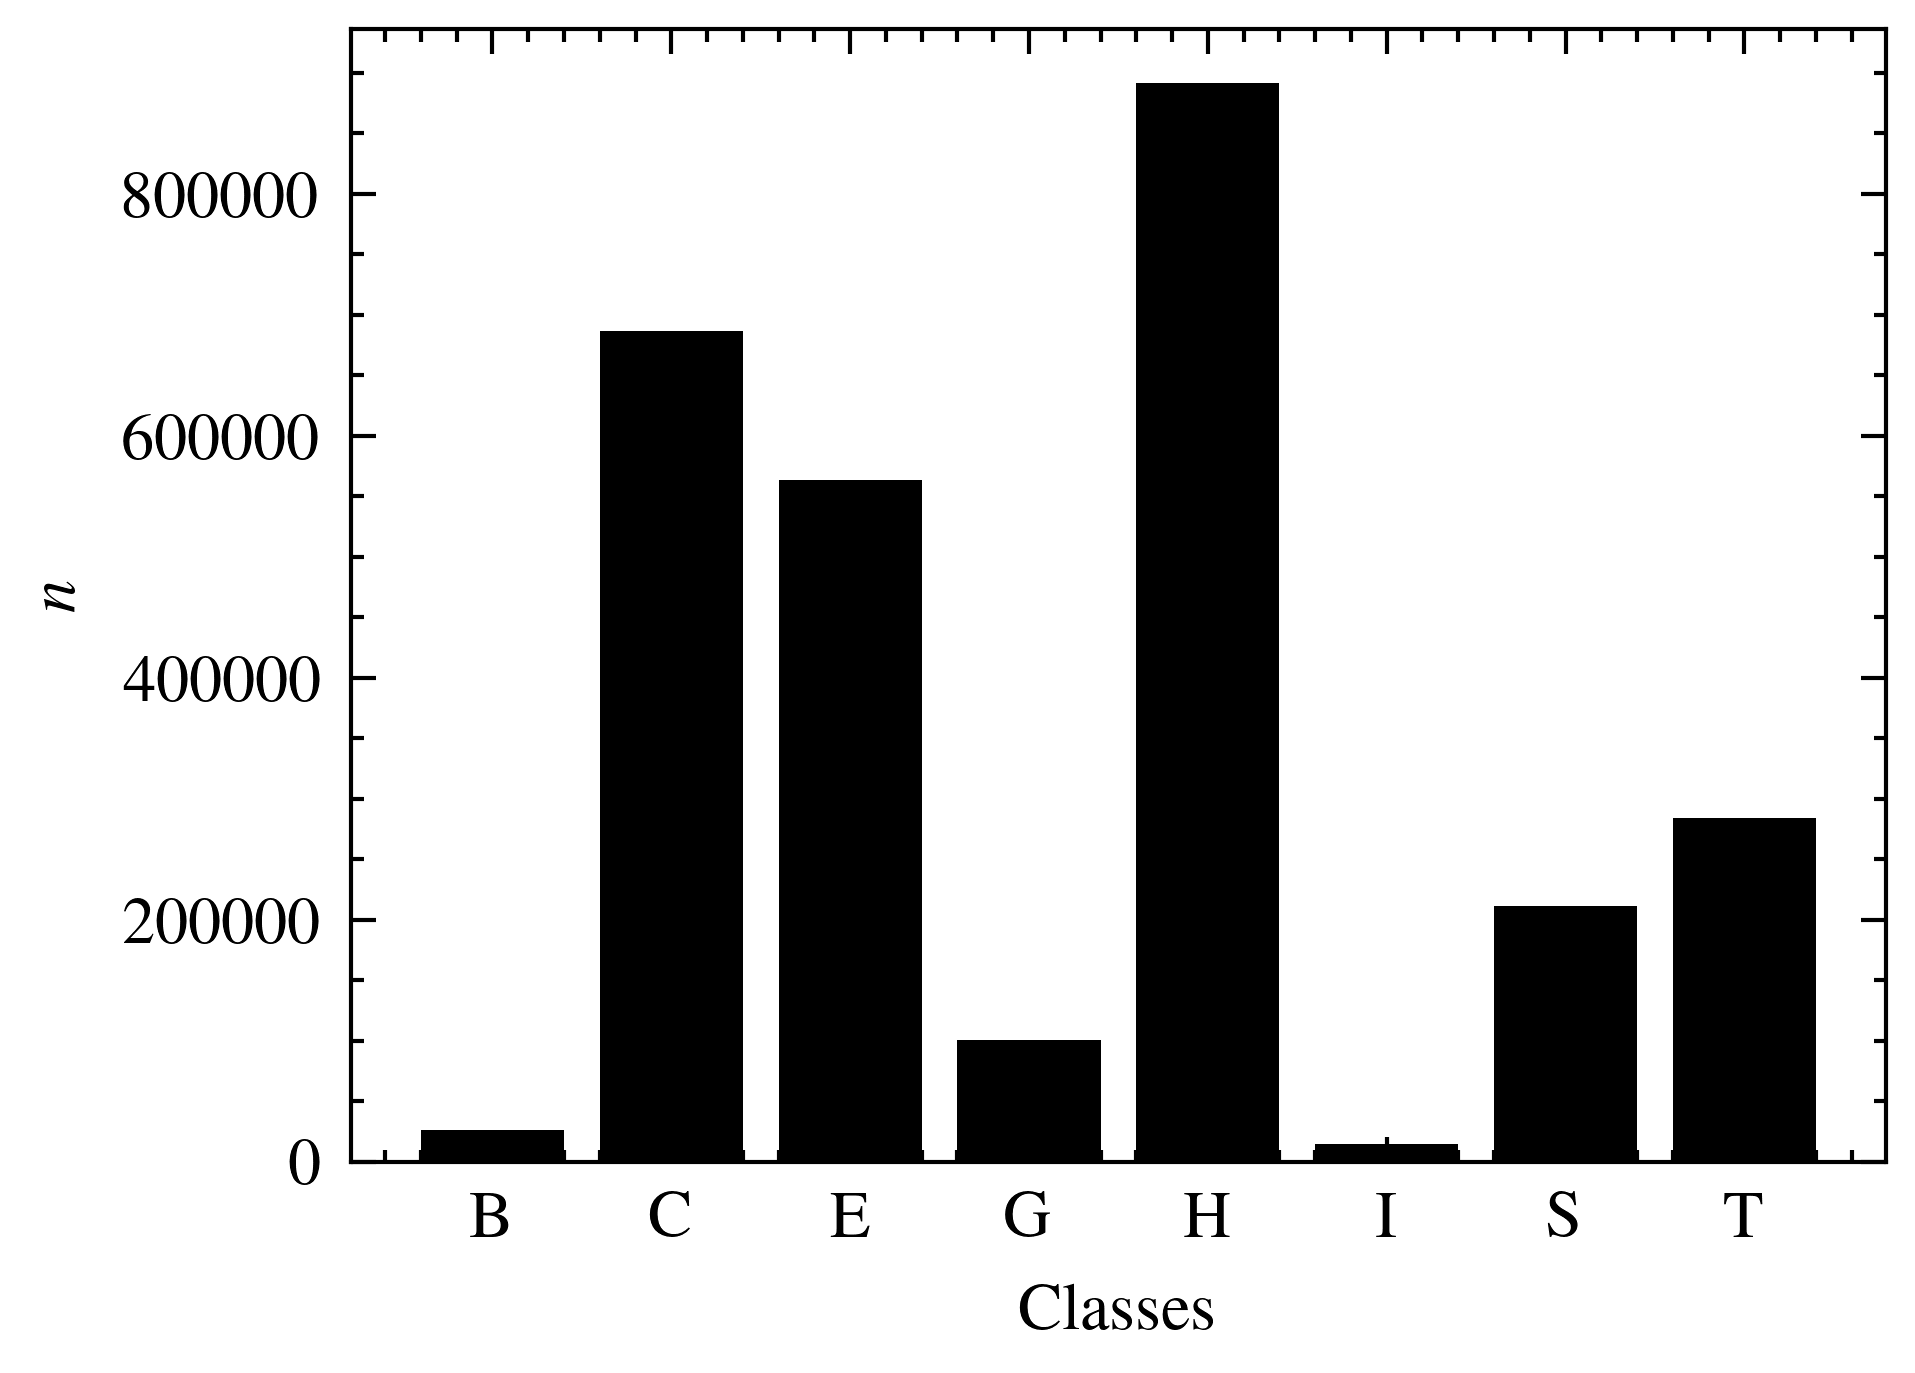

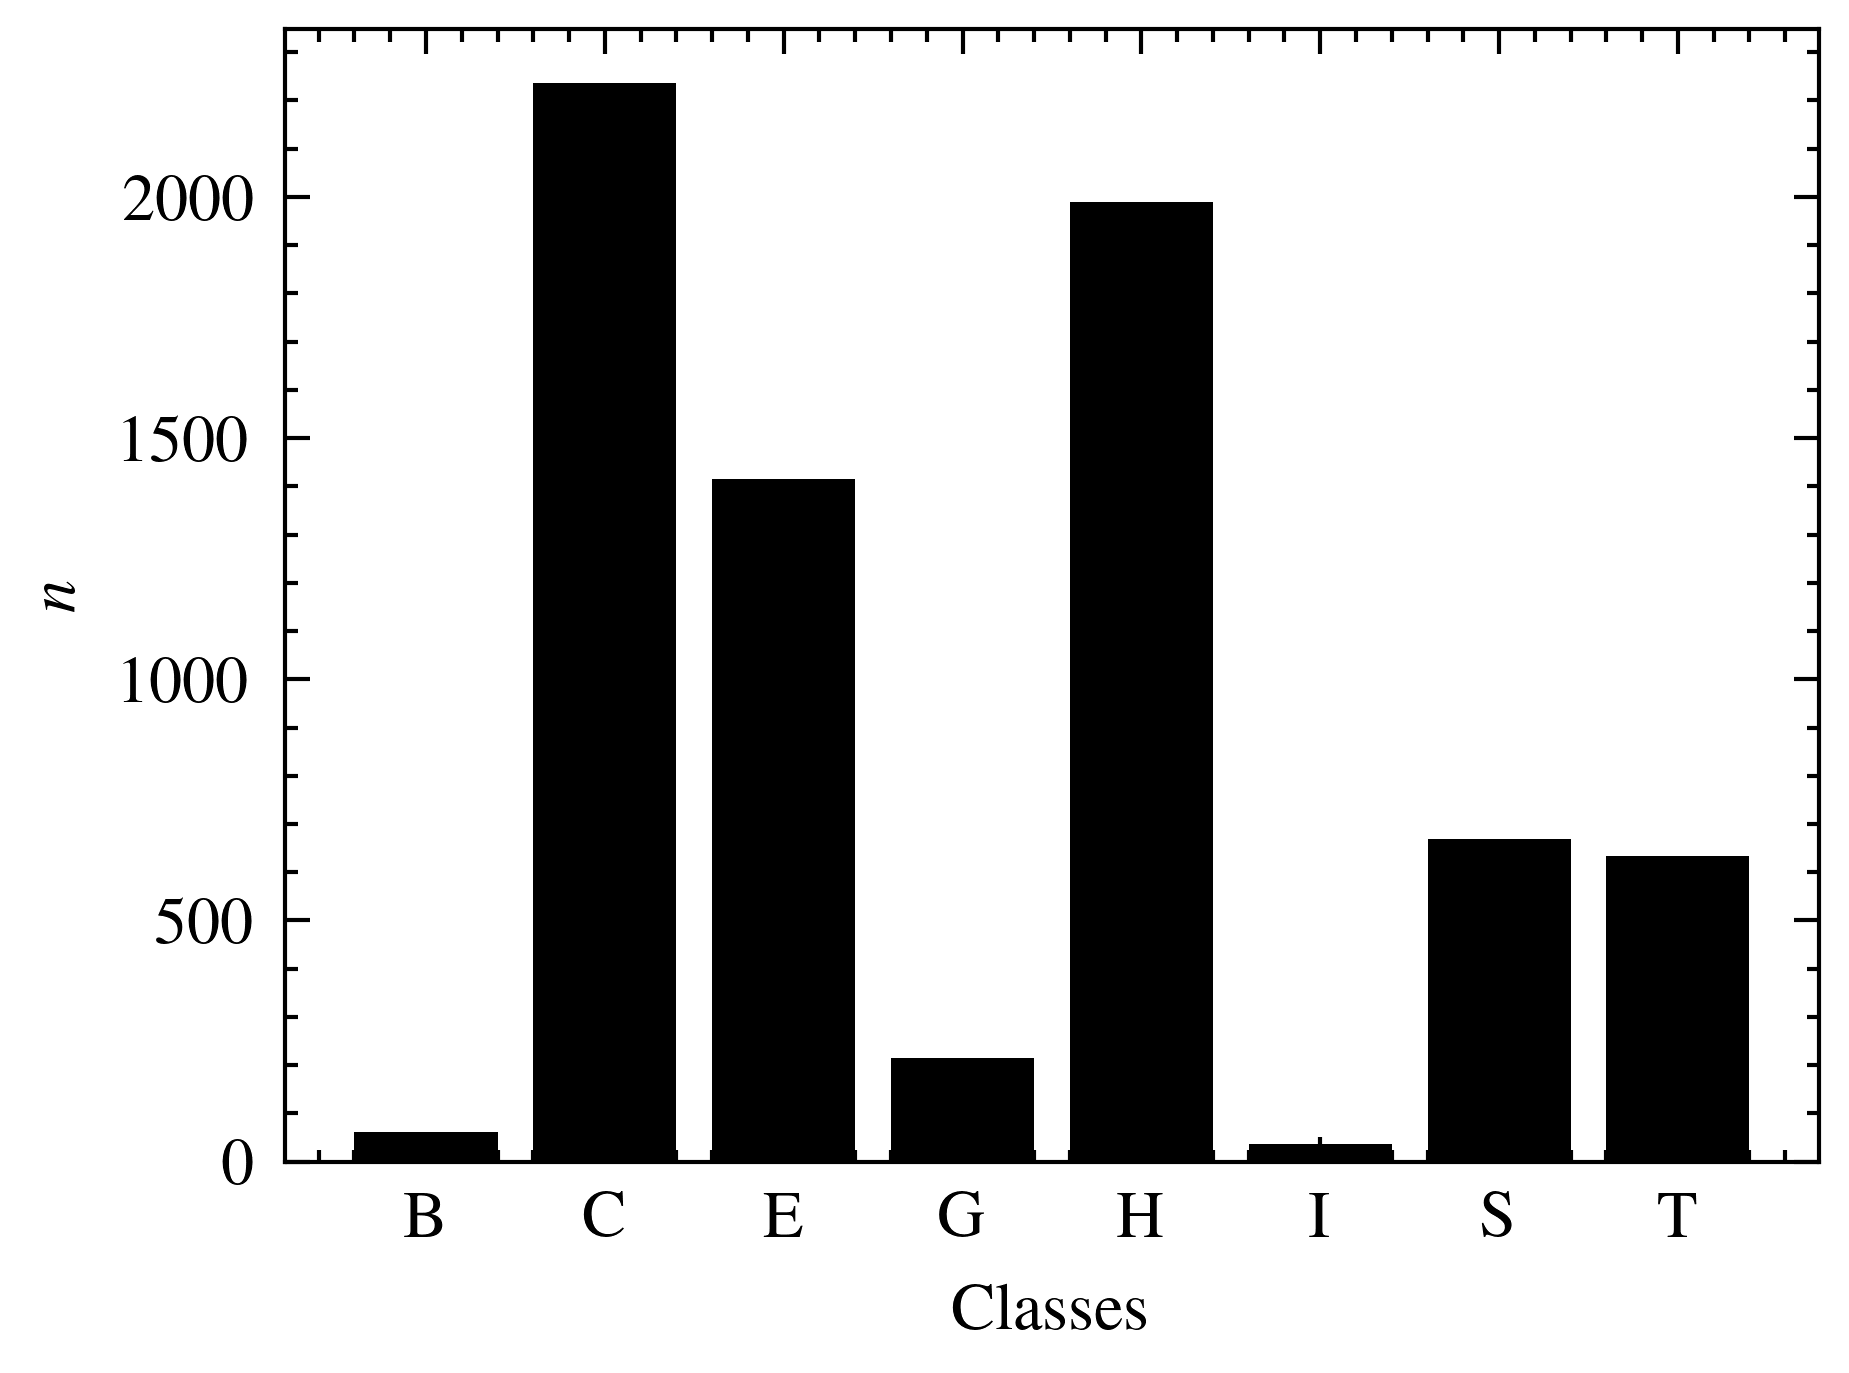

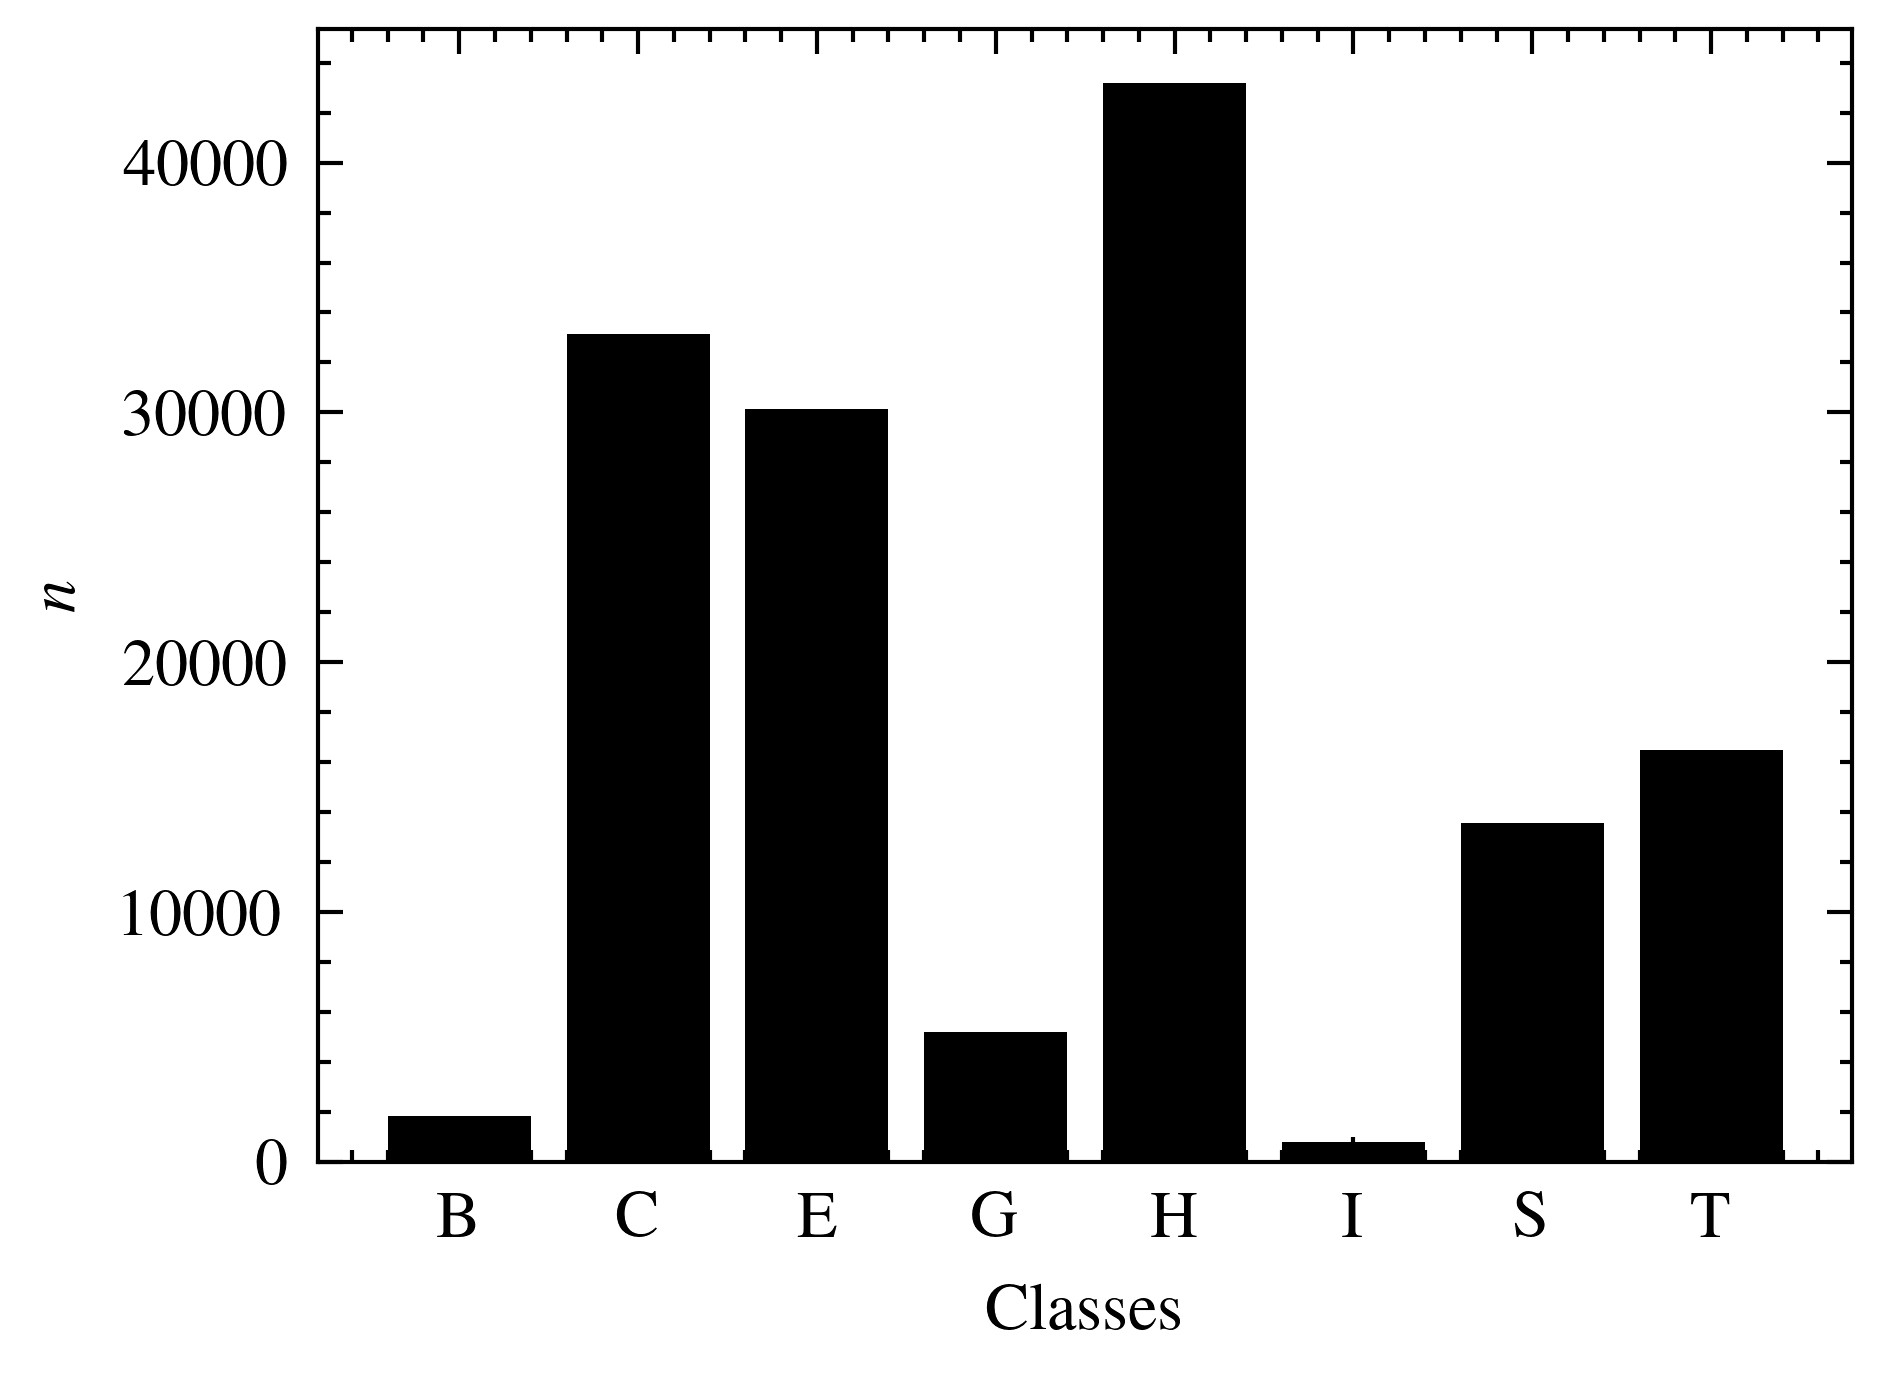

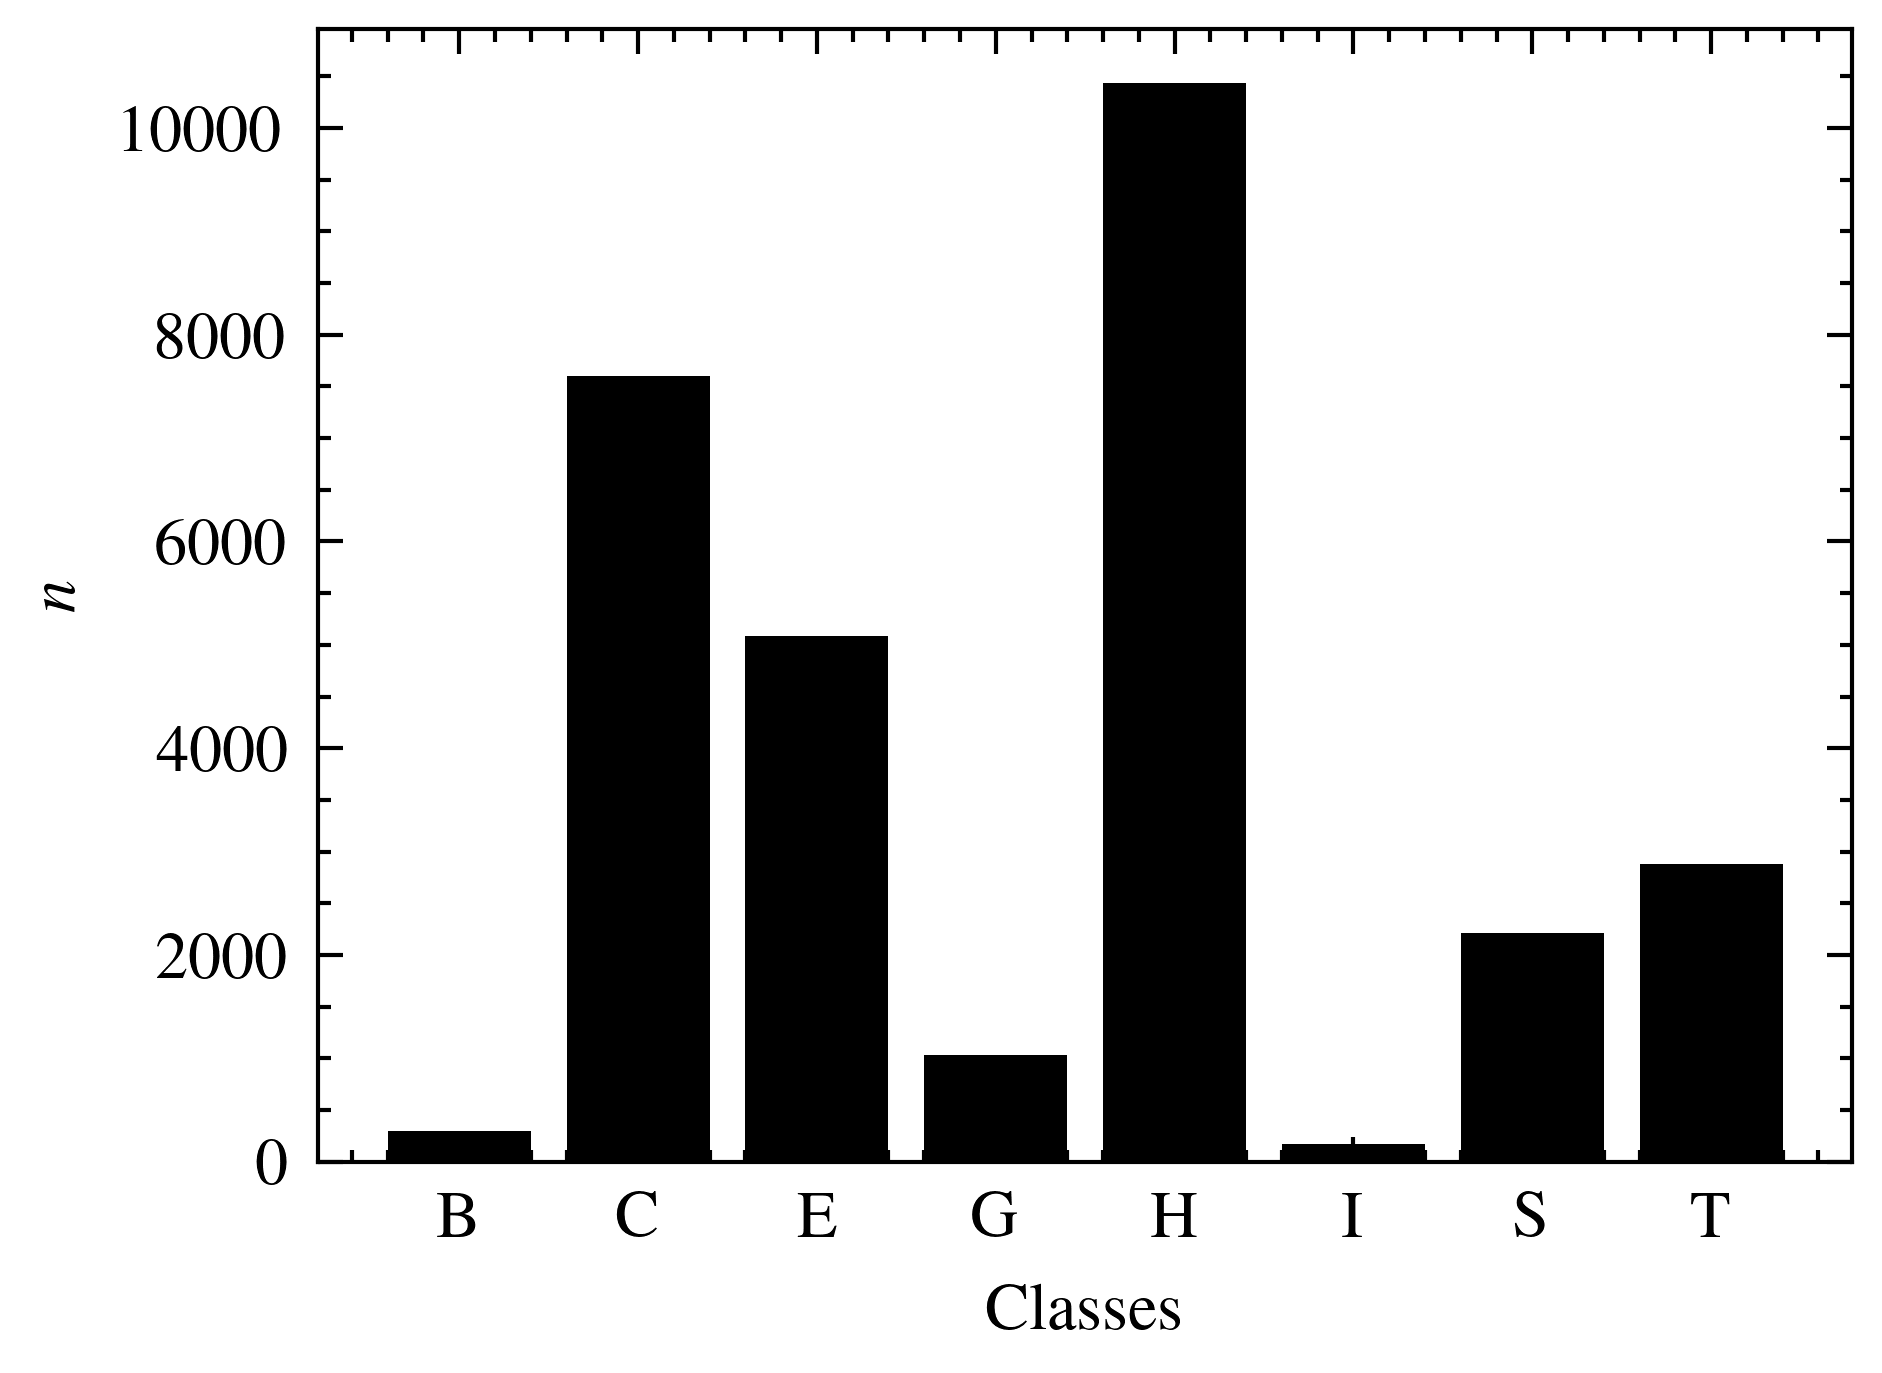

In [339]:
plot_ss(hhblits, "plots/ss_train")
plot_ss(casp12, "plots/ss_casp12_train")
plot_ss(cb513, "plots/ss_cb513_train")
plot_ss(ts115, "plots/ss_ts115_train")

## Disorder

Get the disorder

In [346]:
def plot_disorder(dataset, name):
    mask = dataset[:, :, 50] == 1
    disorder = dataset[:, :, 51][mask]
    unique, counts = np.unique(disorder, return_counts=True)
    with plt.style.context(['science', 'ieee']):
        plt.bar(unique, counts, align='center')
        plt.ylabel('$n$')
        plt.gca().set_xticks(unique)
        plt.xlabel('$Classes$')
        plt.savefig(name)
        plt.show()

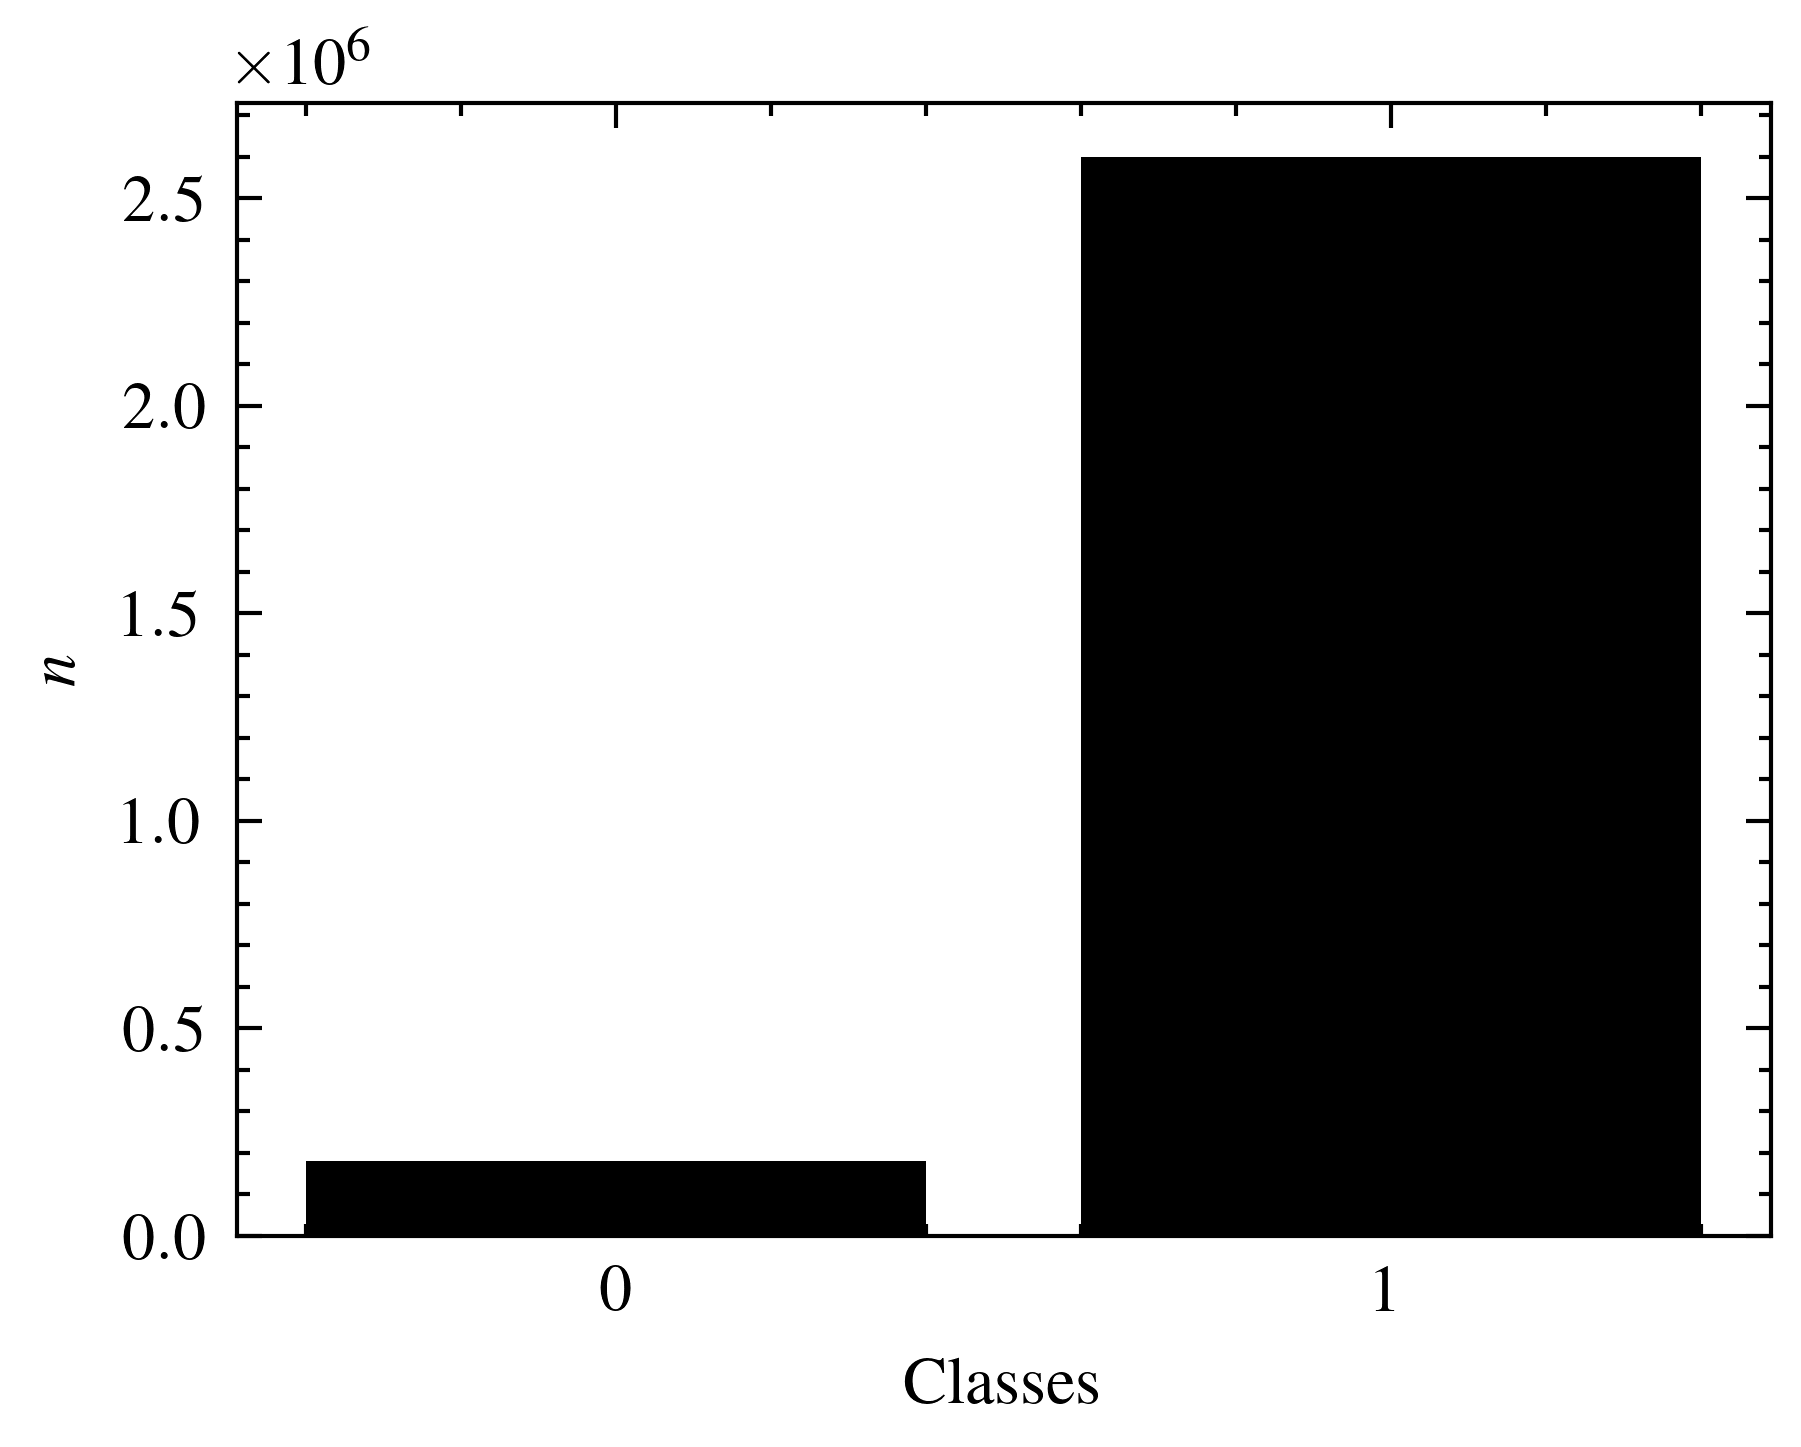

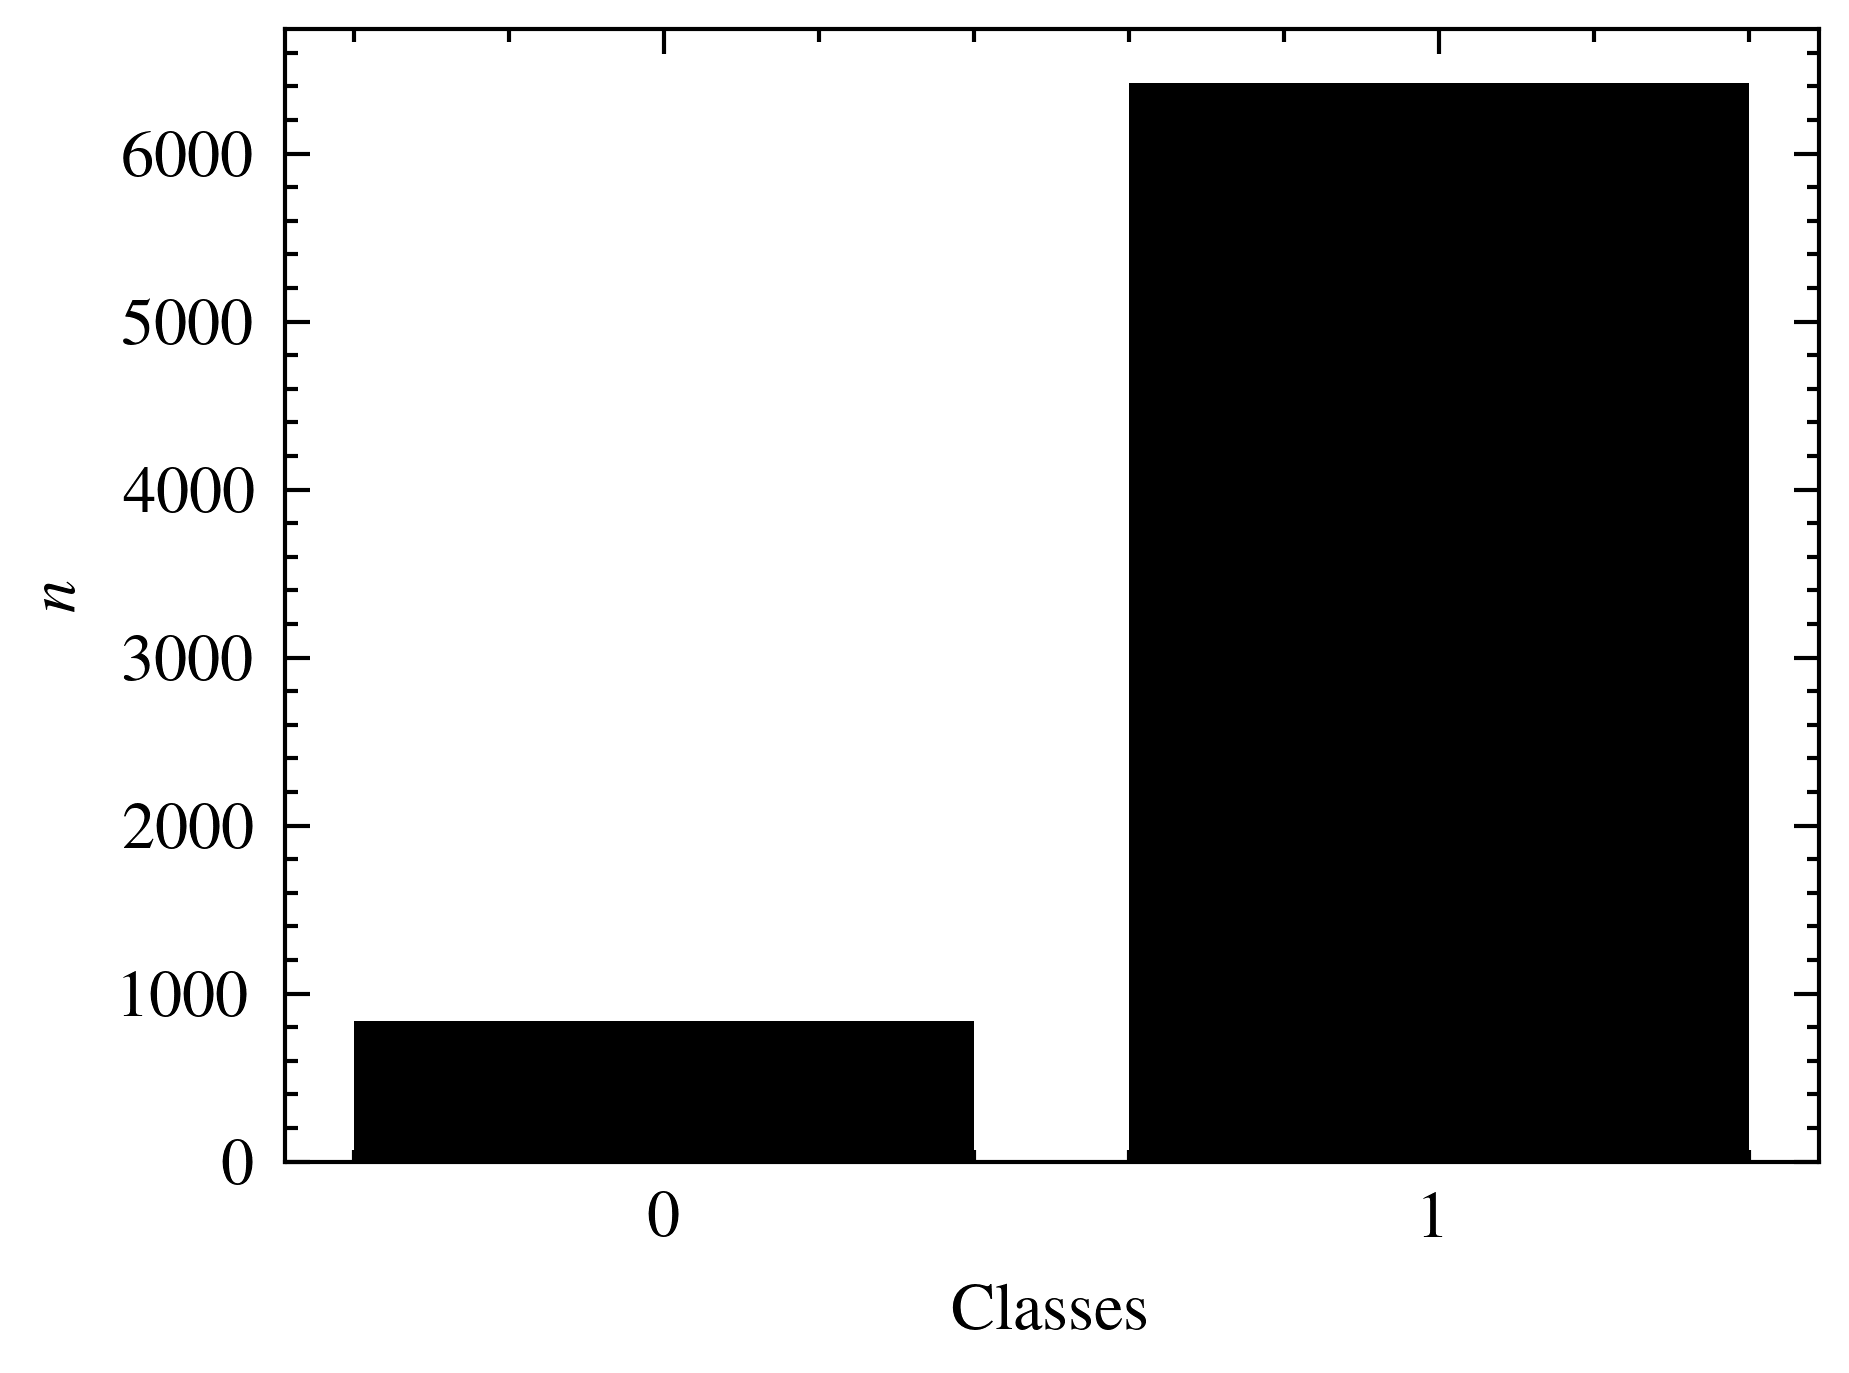

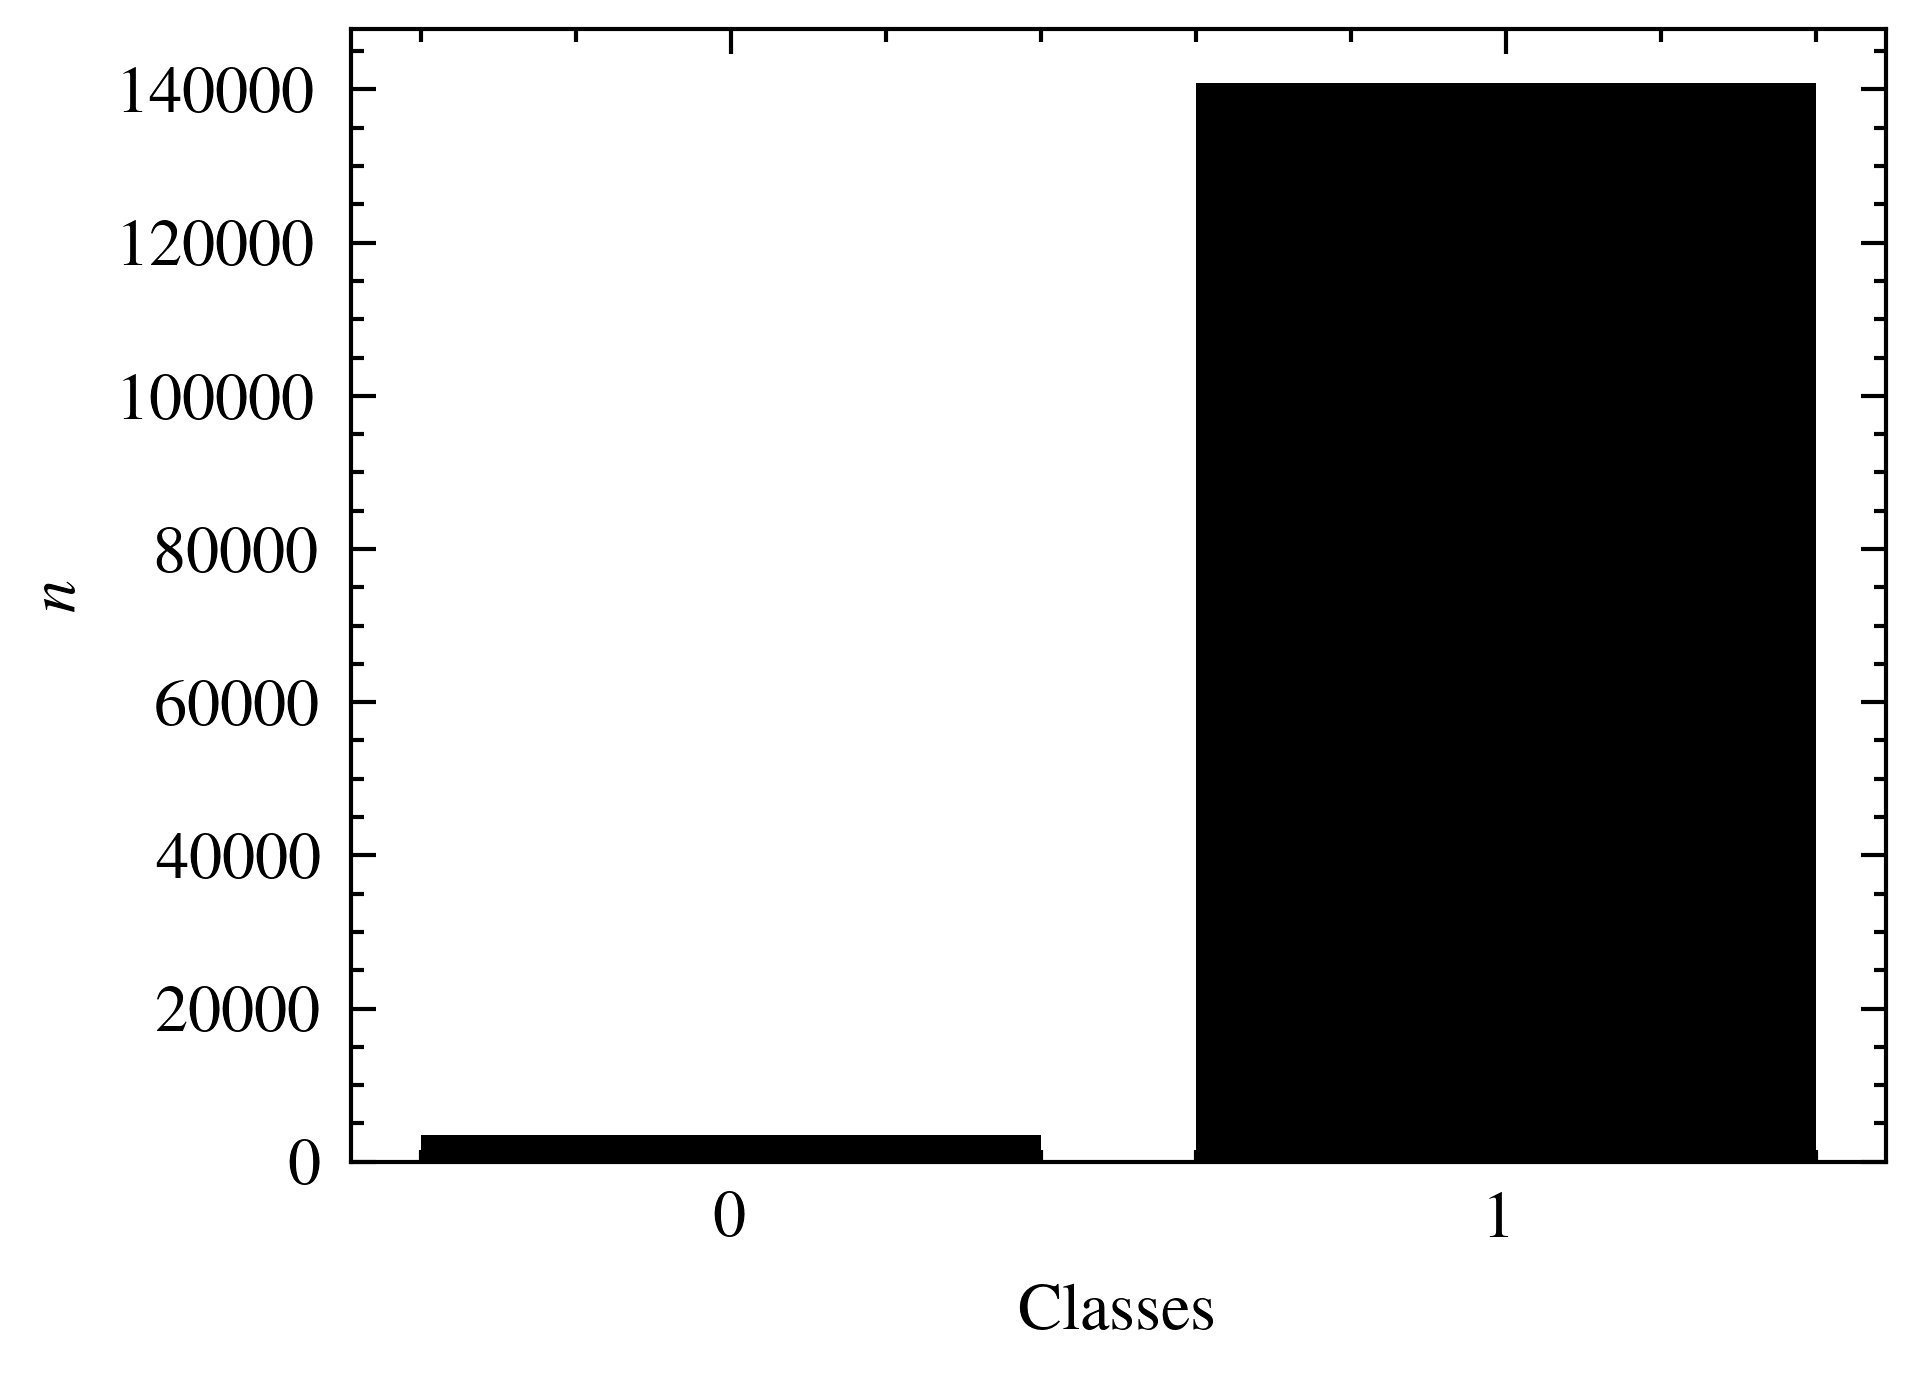

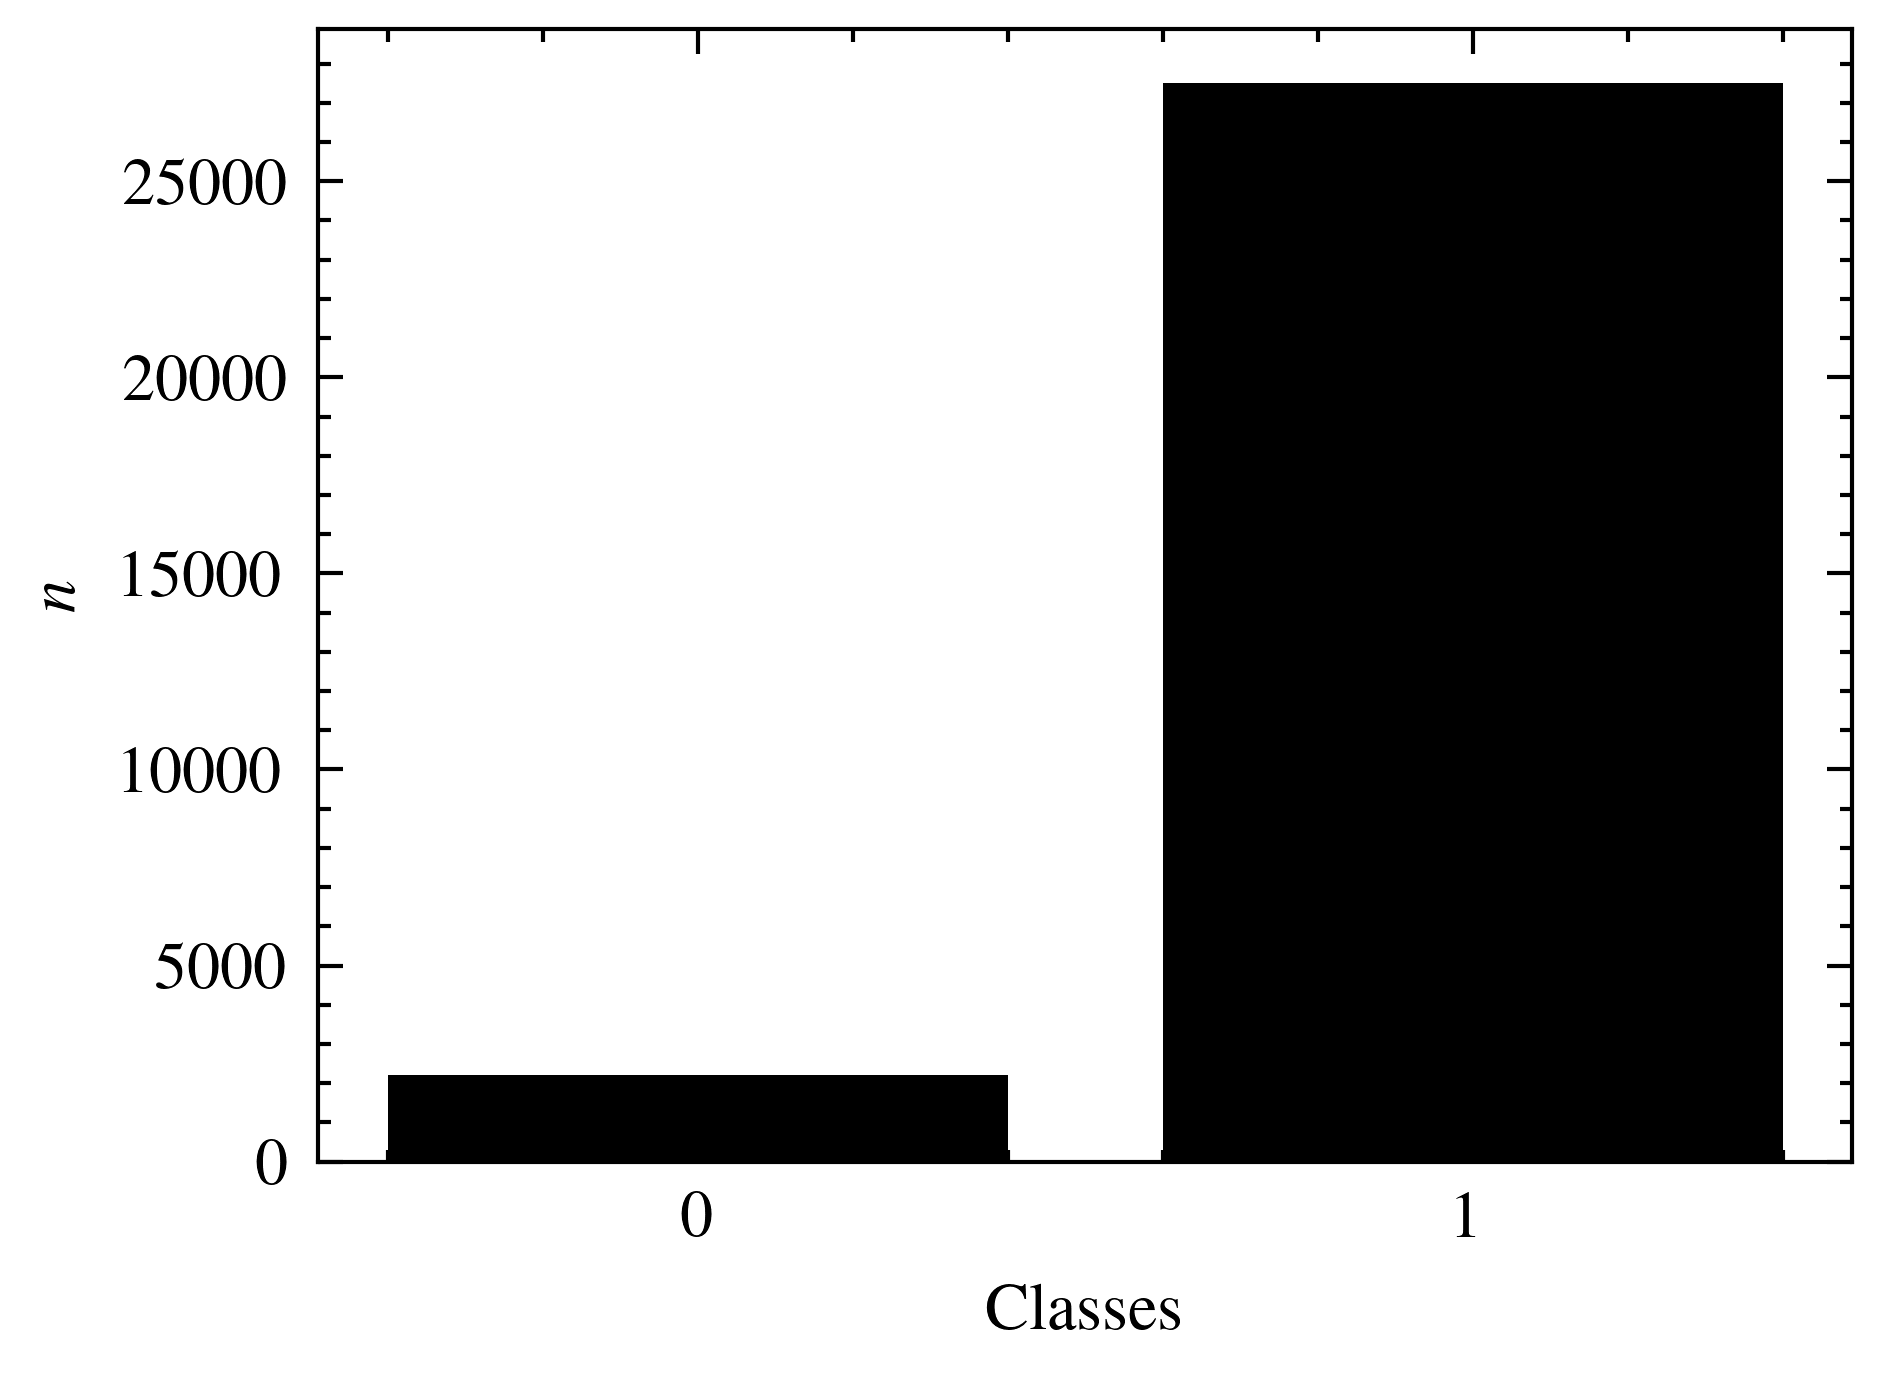

In [347]:
plot_disorder(hhblits, "plots/disorder_train")
plot_disorder(casp12, "plots/disorder_casp12_train")
plot_disorder(cb513, "plots/disorder_cb513_train")
plot_disorder(ts115, "plots/disorder_ts115_train")

## RSA

In [ ]:
def plot_rsa(dataset, name):
    #def plot_disorder(dataset, name):
    plt.style.use(['science', 'ieee'])
    plt.figure(figsize=(5,3))
    grid = plt.GridSpec(2, 2, wspace=0.5, hspace=0.4)

    mask = (dataset[:, :, 50] == 1) & (dataset[:, :, 51] == 1)
    rsa_iso = dataset[:, :, 55][mask]
    rsa_cpx = dataset[:, :, 56][mask]

    plt.subplot(grid[1, 0])

    plt.hist(x=rsa_iso, bins='auto')
    plt.ylabel('$n$')
    plt.xlabel('$RSA$ $isolated$')
    #plt.savefig(name)

    plt.subplot(grid[1, 1])

    plt.hist(x=rsa_cpx, bins='auto')
    plt.ylabel('$n$')
    plt.xlabel('$RSA$ $complex$')
    #plt.savefig(name)

    #plt.subplot(grid[0, 0:])
    #plt.scatter(x=rsa_iso, y=rsa_cpx, s=[1],linewidth=0.1,marker='.', alpha=0.3)
    #plt.ylabel('$RSA$ $complex$')
    #plt.xlabel('$RSA$ $isolated$')

    plt.show()
    


Plot data

In [ ]:
plot_rsa(hhblits, "plots/rsa_train")
plot_rsa(casp12, "plots/rsa_casp12_train")
plot_rsa(cb513, "plots/rsa_cb513_train")
plot_rsa(ts115, "plots/rsa_ts115_train")

# Ramachandran

In [ ]:
def psi_phi_analysis(dataset, name):
    plt.style.use(['science', 'ieee'])

    plt.figure(figsize=(6,3))
    grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.45)

    plt.subplot(grid[:, 0])

        # General variable for the background preferences
    rama_preferences = {
        "General": {
            "file": "rama500-general.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#B3E8FF', '#7FD9FF']),
            "bounds": [0, 0.0005, 0.02, 1],
        },
        "GLY": {
            "file": "rama500-gly-sym.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#FFE8C5', '#FFCC7F']),
            "bounds": [0, 0.002, 0.02, 1],
        },
        "PRO": {
            "file": "rama500-pro.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#D0FFC5', '#7FFF8C']),
            "bounds": [0, 0.002, 0.02, 1],
        },
        "PRE-PRO": {
            "file": "rama500-prepro.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#B3E8FF', '#7FD9FF']),
            "bounds": [0, 0.002, 0.02, 1],
        }
    }

        # Read in the expected torsion angles
    __location__= '/home/eryk/development/NSPThesis/data/analysis/' #You must set the ptah of the .data files here


    rama_pref_values = {}
    for key, val in rama_preferences.items():
        rama_pref_values[key] = np.full((360, 360), 0, dtype=np.float64)
        with open(os.path.join(__location__, "rama500-general.data")) as fn:
            for line in fn:
                if not line.startswith("#"):
                        # Preference file has values for every second position only
                    rama_pref_values[key][int(float(line.split()[1])) + 180][int(float(line.split()[0])) + 180] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 179][int(float(line.split()[0])) + 179] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 179][int(float(line.split()[0])) + 180] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 180][int(float(line.split()[0])) + 179] = float(
                        line.split()[2])

    normals = {}
    outliers = {}
    for key, val in rama_preferences.items():
        normals[key] = {"x": [], "y": [],'Res':[]}
        outliers[key] = {"x": [], "y": []}

        # Calculate the torsion angle of the inputs
        #for inp in sys.argv[1:]:
            #if not os.path.isfile(inp):
                #print("{} not found!".format(inp))
                #continue

    angles = angles = dataset[:, :, 65:67][(dataset[:, :, 50] == 1) & (dataset[:, :, 51] == 1)].flatten().reshape(-1, 2)

    angles = angles[(angles[:, :] != 360)]
    angles = np.reshape(angles, (-1, 2))

    for phi, psi in (angles):
        aa_type = "General"

        if rama_pref_values[aa_type][int(math.radians(psi))][int(math.radians(phi))] < \
            rama_preferences[aa_type]["bounds"][1]:
                #rint("{} {} {} {}{} is an outlier".format(inp, model, chain, res_name, res_num))
                #breakpoint()
            outliers[aa_type]["x"].append(psi)
            outliers[aa_type]["y"].append(phi)
        else:
            normals[aa_type]["x"].append(psi)
            normals[aa_type]["y"].append(phi)
                #normals[aa_type]['Res'].append(""+'_'+str(res_num))

    key = "General"
    #plt.title("Ramachandran",fontsize=10)
    plt.imshow(rama_pref_values[key], cmap=rama_preferences[key]["cmap"], norm=colors.BoundaryNorm(rama_preferences[key]["bounds"], rama_preferences[key]["cmap"].N), extent=(-180, 180, 180, -180),alpha=0.9, aspect='auto')
    plt.scatter(normals[key]["x"], normals[key]["y"],s=[1],marker='.', linewidth=0.1, alpha=0.05)

    #for key in normals:
        #for i, name in enumerate (normals[key]['Res']):
            #plt.annotate(name, (normals[key]["x"][i], normals[key]["y"][i]))

    plt.scatter(outliers[key]["x"], outliers[key]["y"],color="red",s=[1],linewidth=0.1,marker='.', alpha=0.5)
    plt.xlim([-180, 180])
    plt.ylim([-180, 180])
    plt.plot([-180, 180], [0, 0],color="k",alpha=0.7)
    plt.plot([0, 0], [-180, 180],color="k",alpha=0.7)
    plt.xlabel(r'$\phi$',fontsize=12)
    plt.ylabel(r'$\psi$',fontsize=12)
    #plt.grid(linestyle='dotted')

    plt.subplot(grid[0, 1])

    plt.hist(x=normals["General"]['x'], bins=100)
    plt.xlabel('$\phi$',fontsize=12)
    plt.ylabel('$n$',fontsize=12)
    plt.xlim([-180, 180])
    #plt.title("Phi",fontsize=10)
    #
    plt.subplot(grid[1, 1])

    plt.hist(x=normals["General"]['y'], bins=100)
    plt.xlabel('$\psi$',fontsize=12)
    plt.ylabel('$n$',fontsize=12)
    plt.xlim([-180, 180])
    #plt.title("Psi",fontsize=10)

    plt.savefig(name)
    plt.show()

Plot the ramachandran for the training datasets

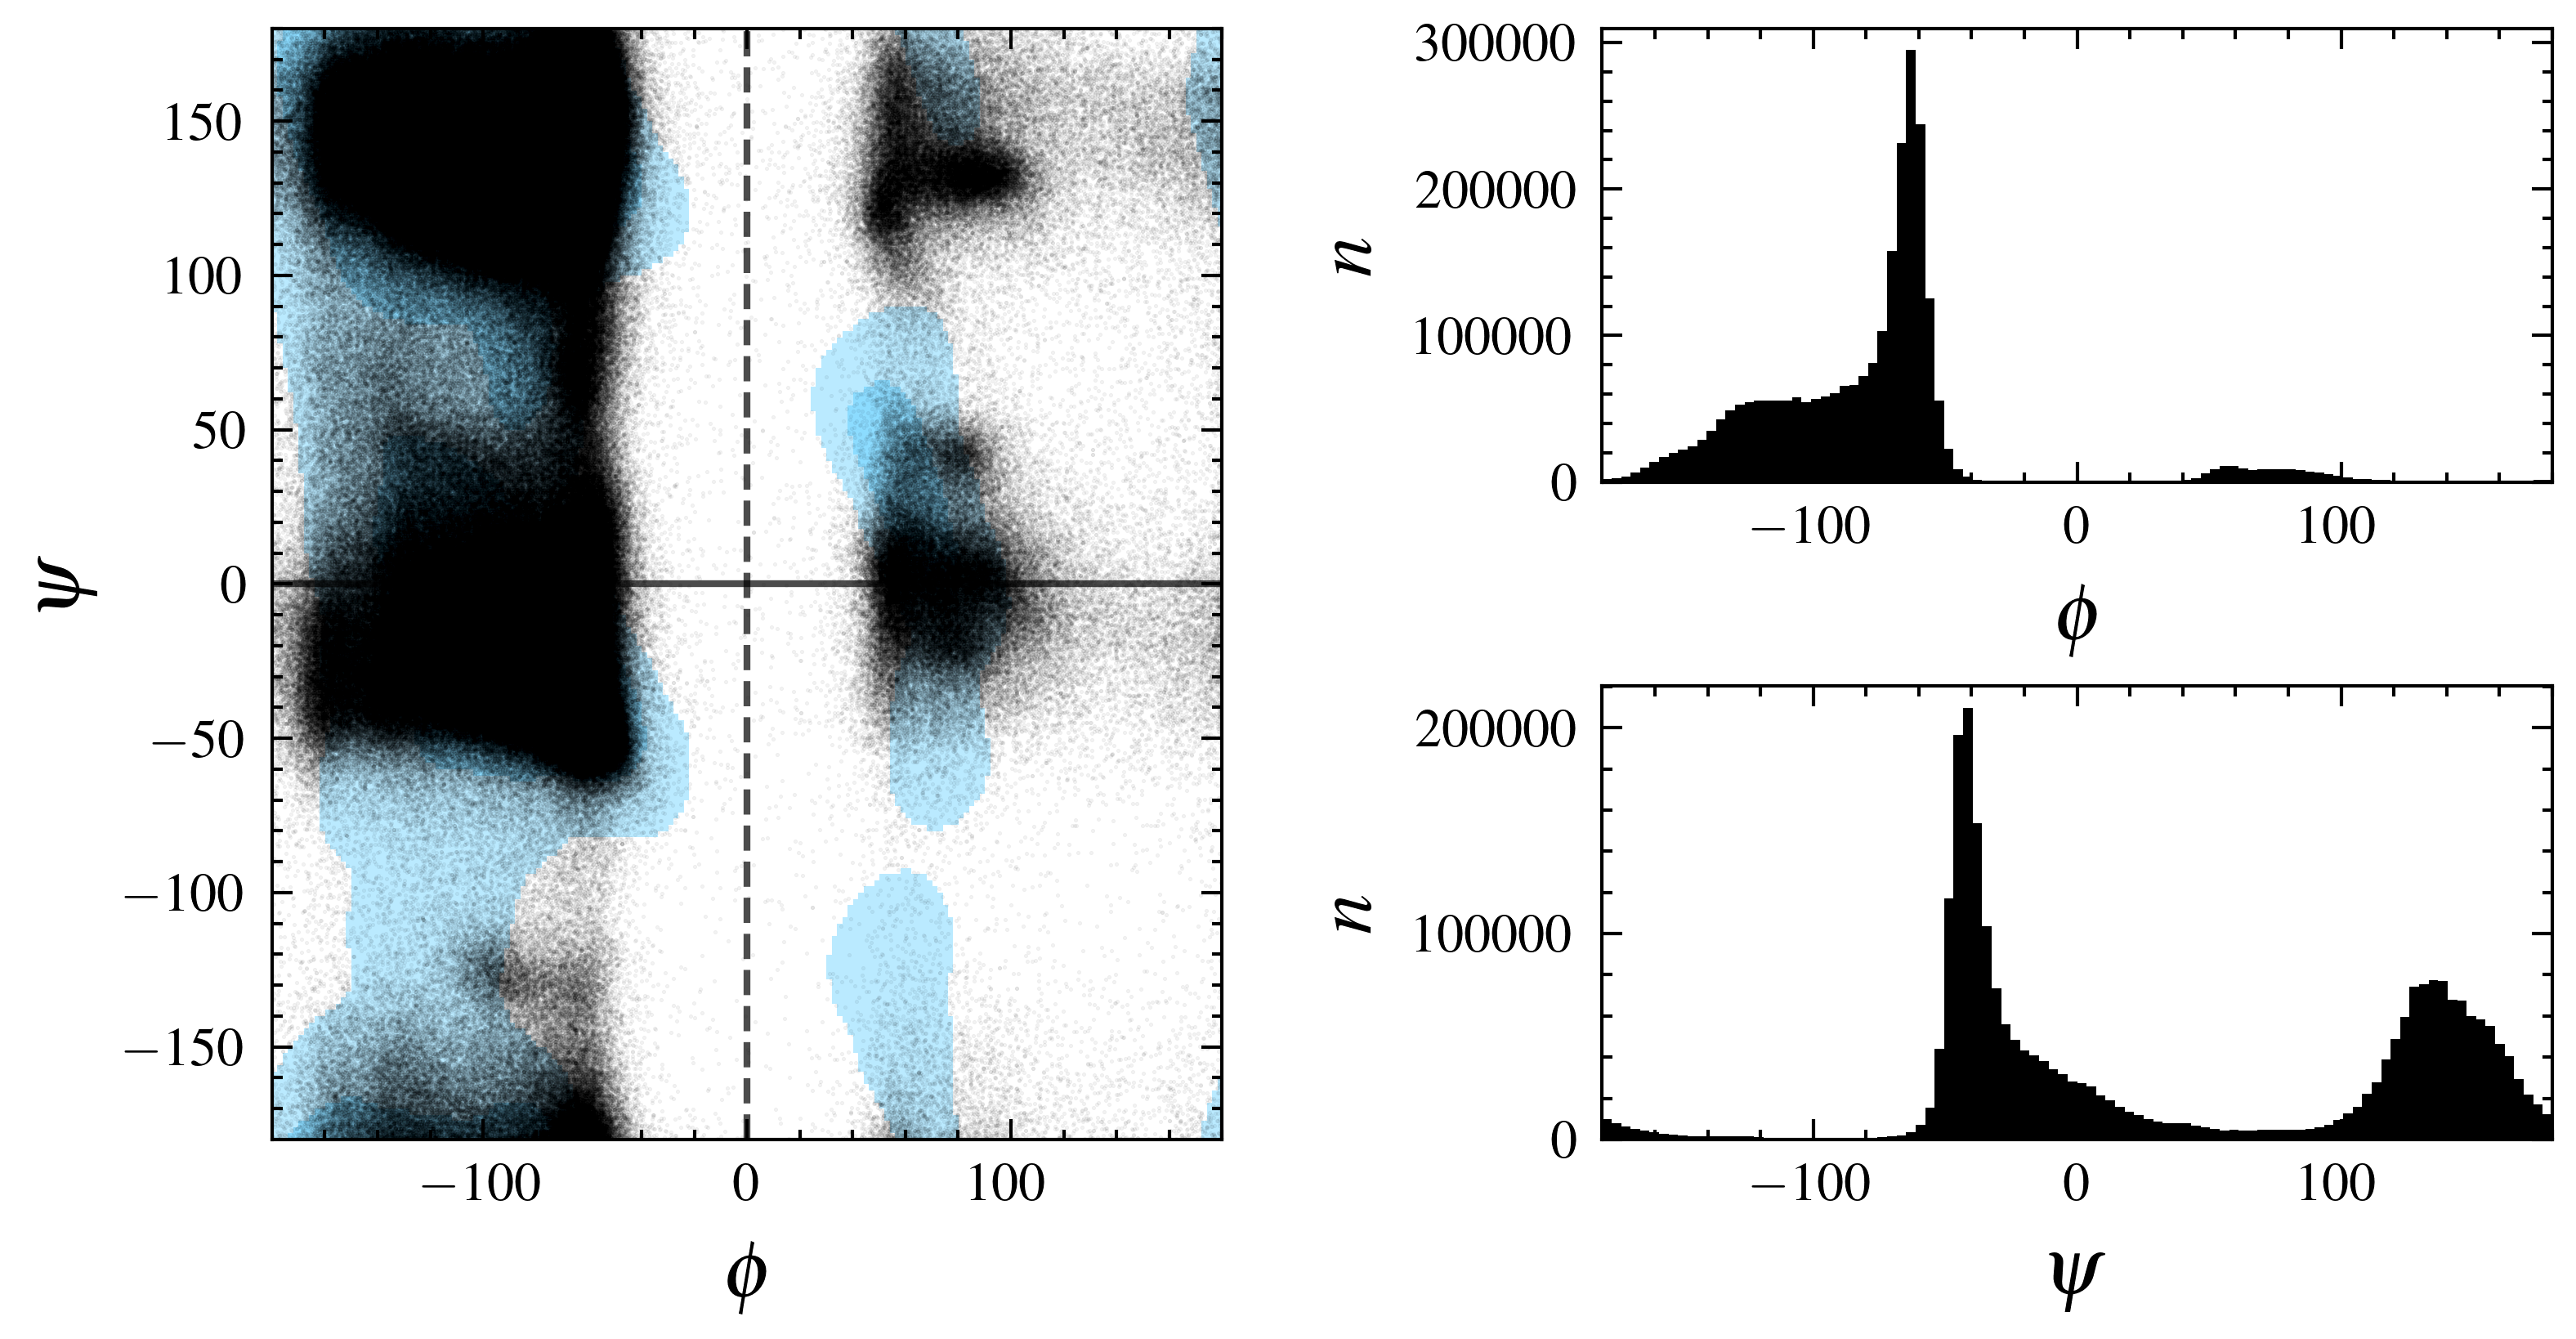

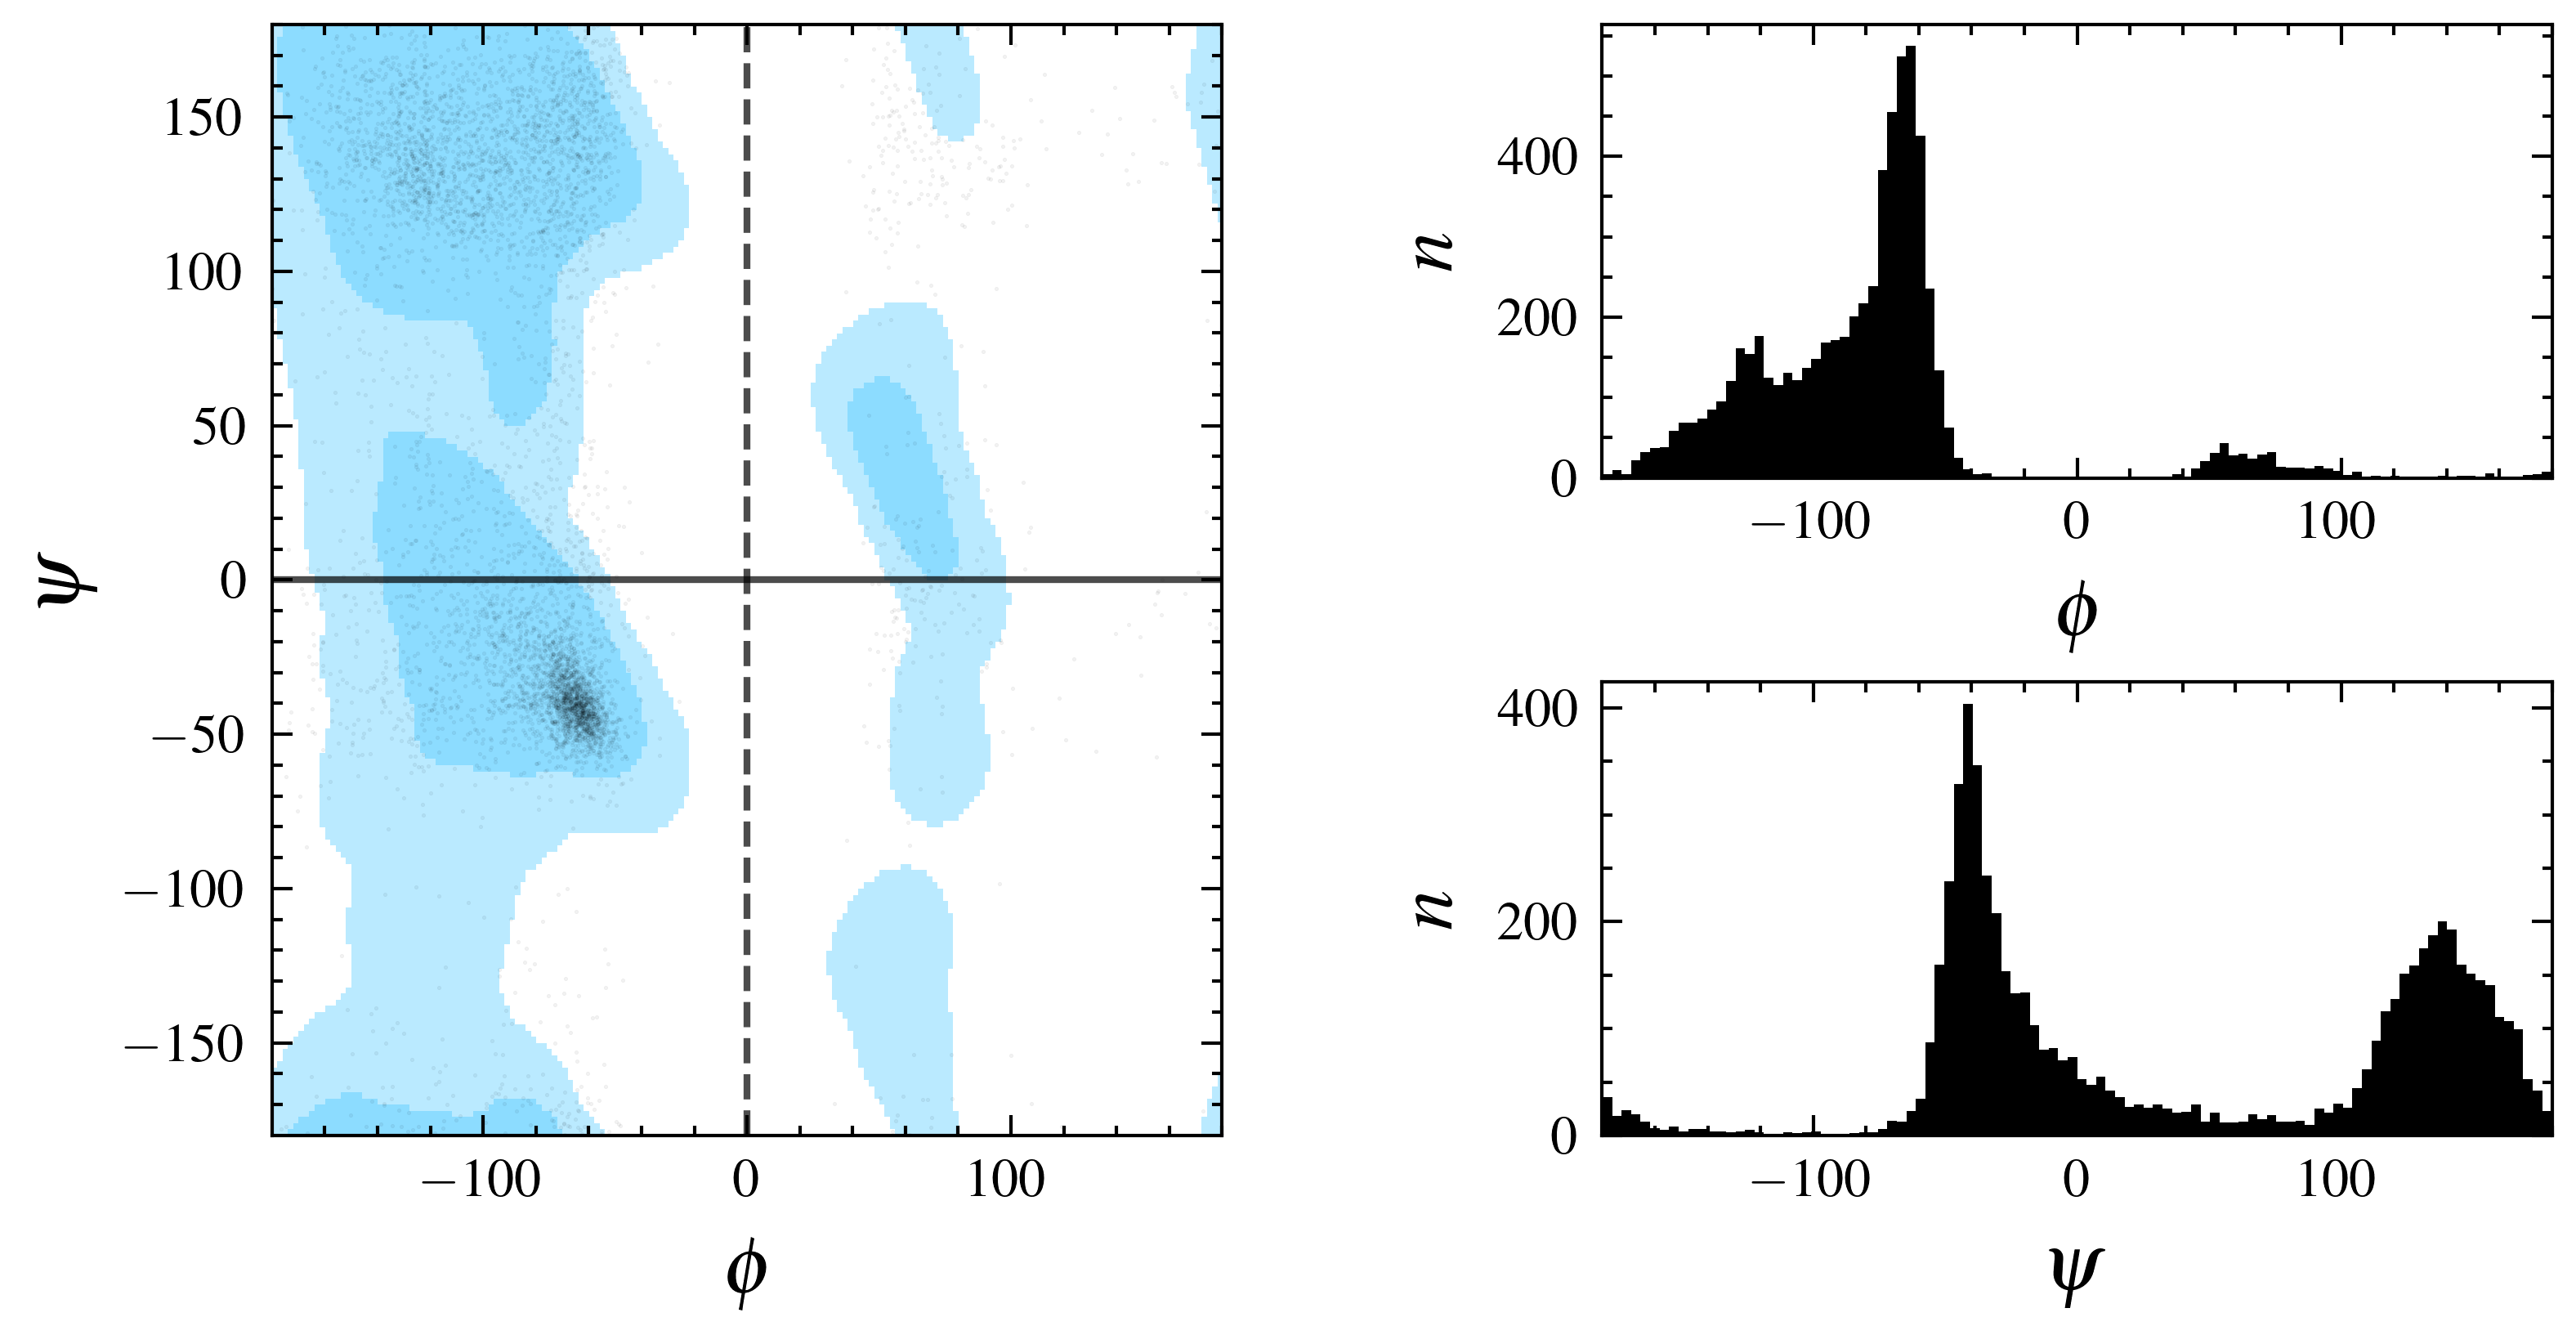

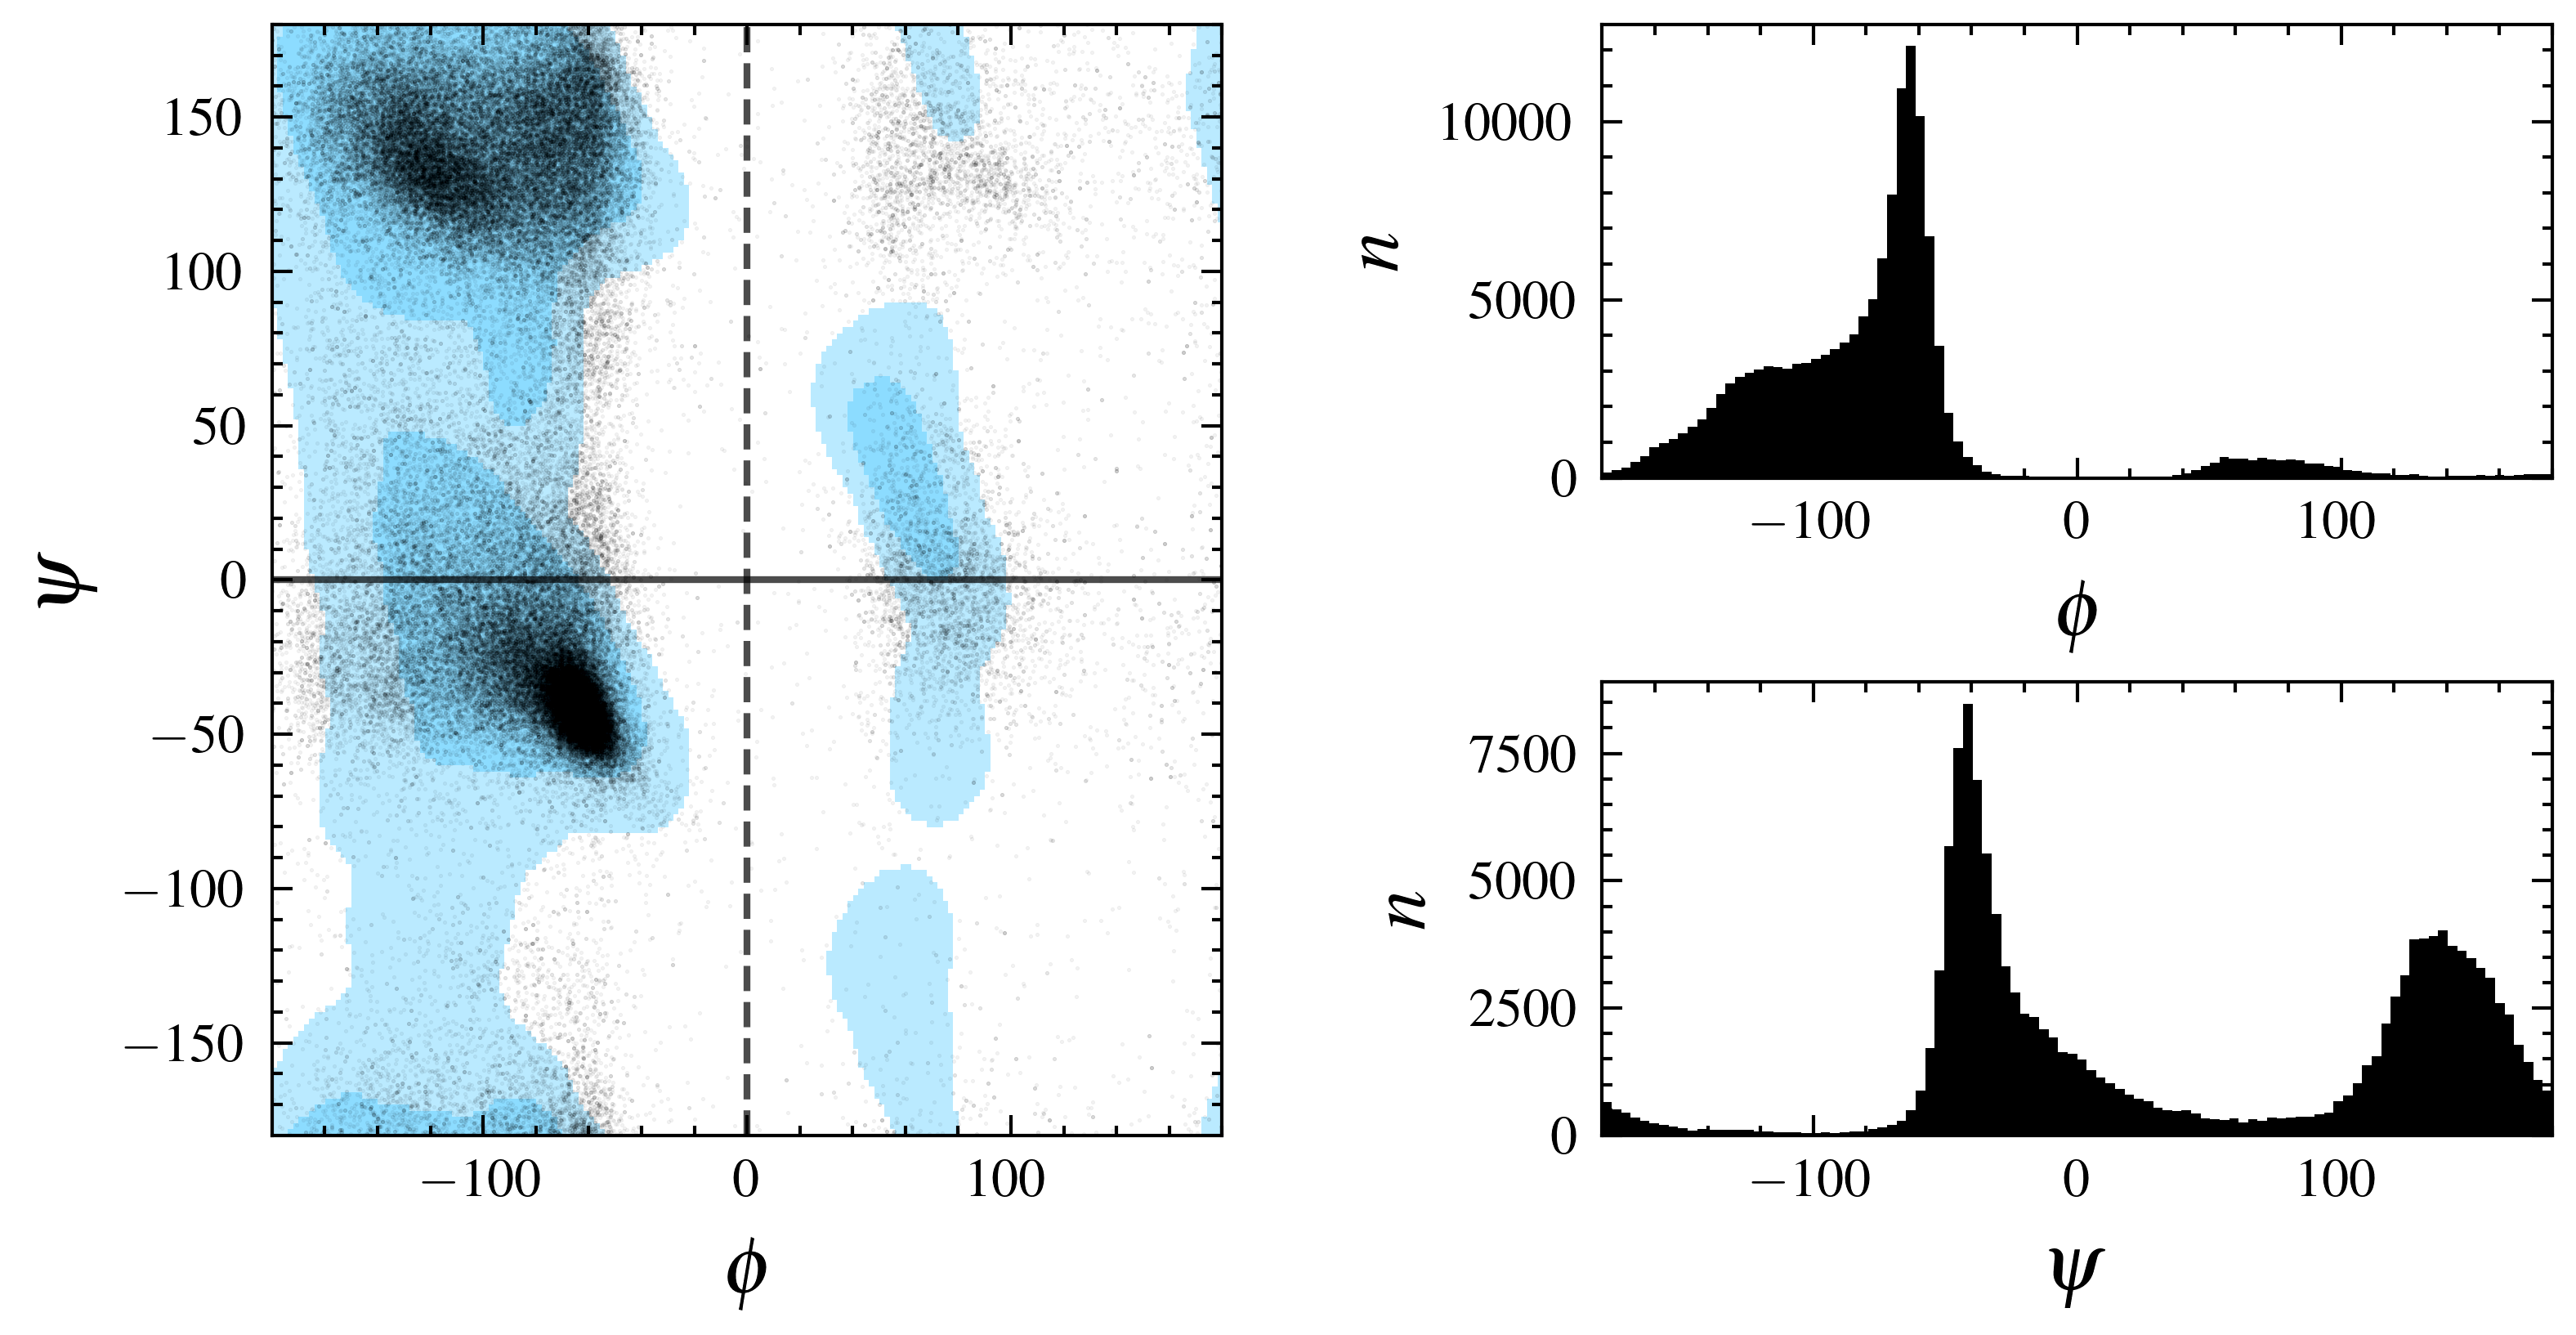

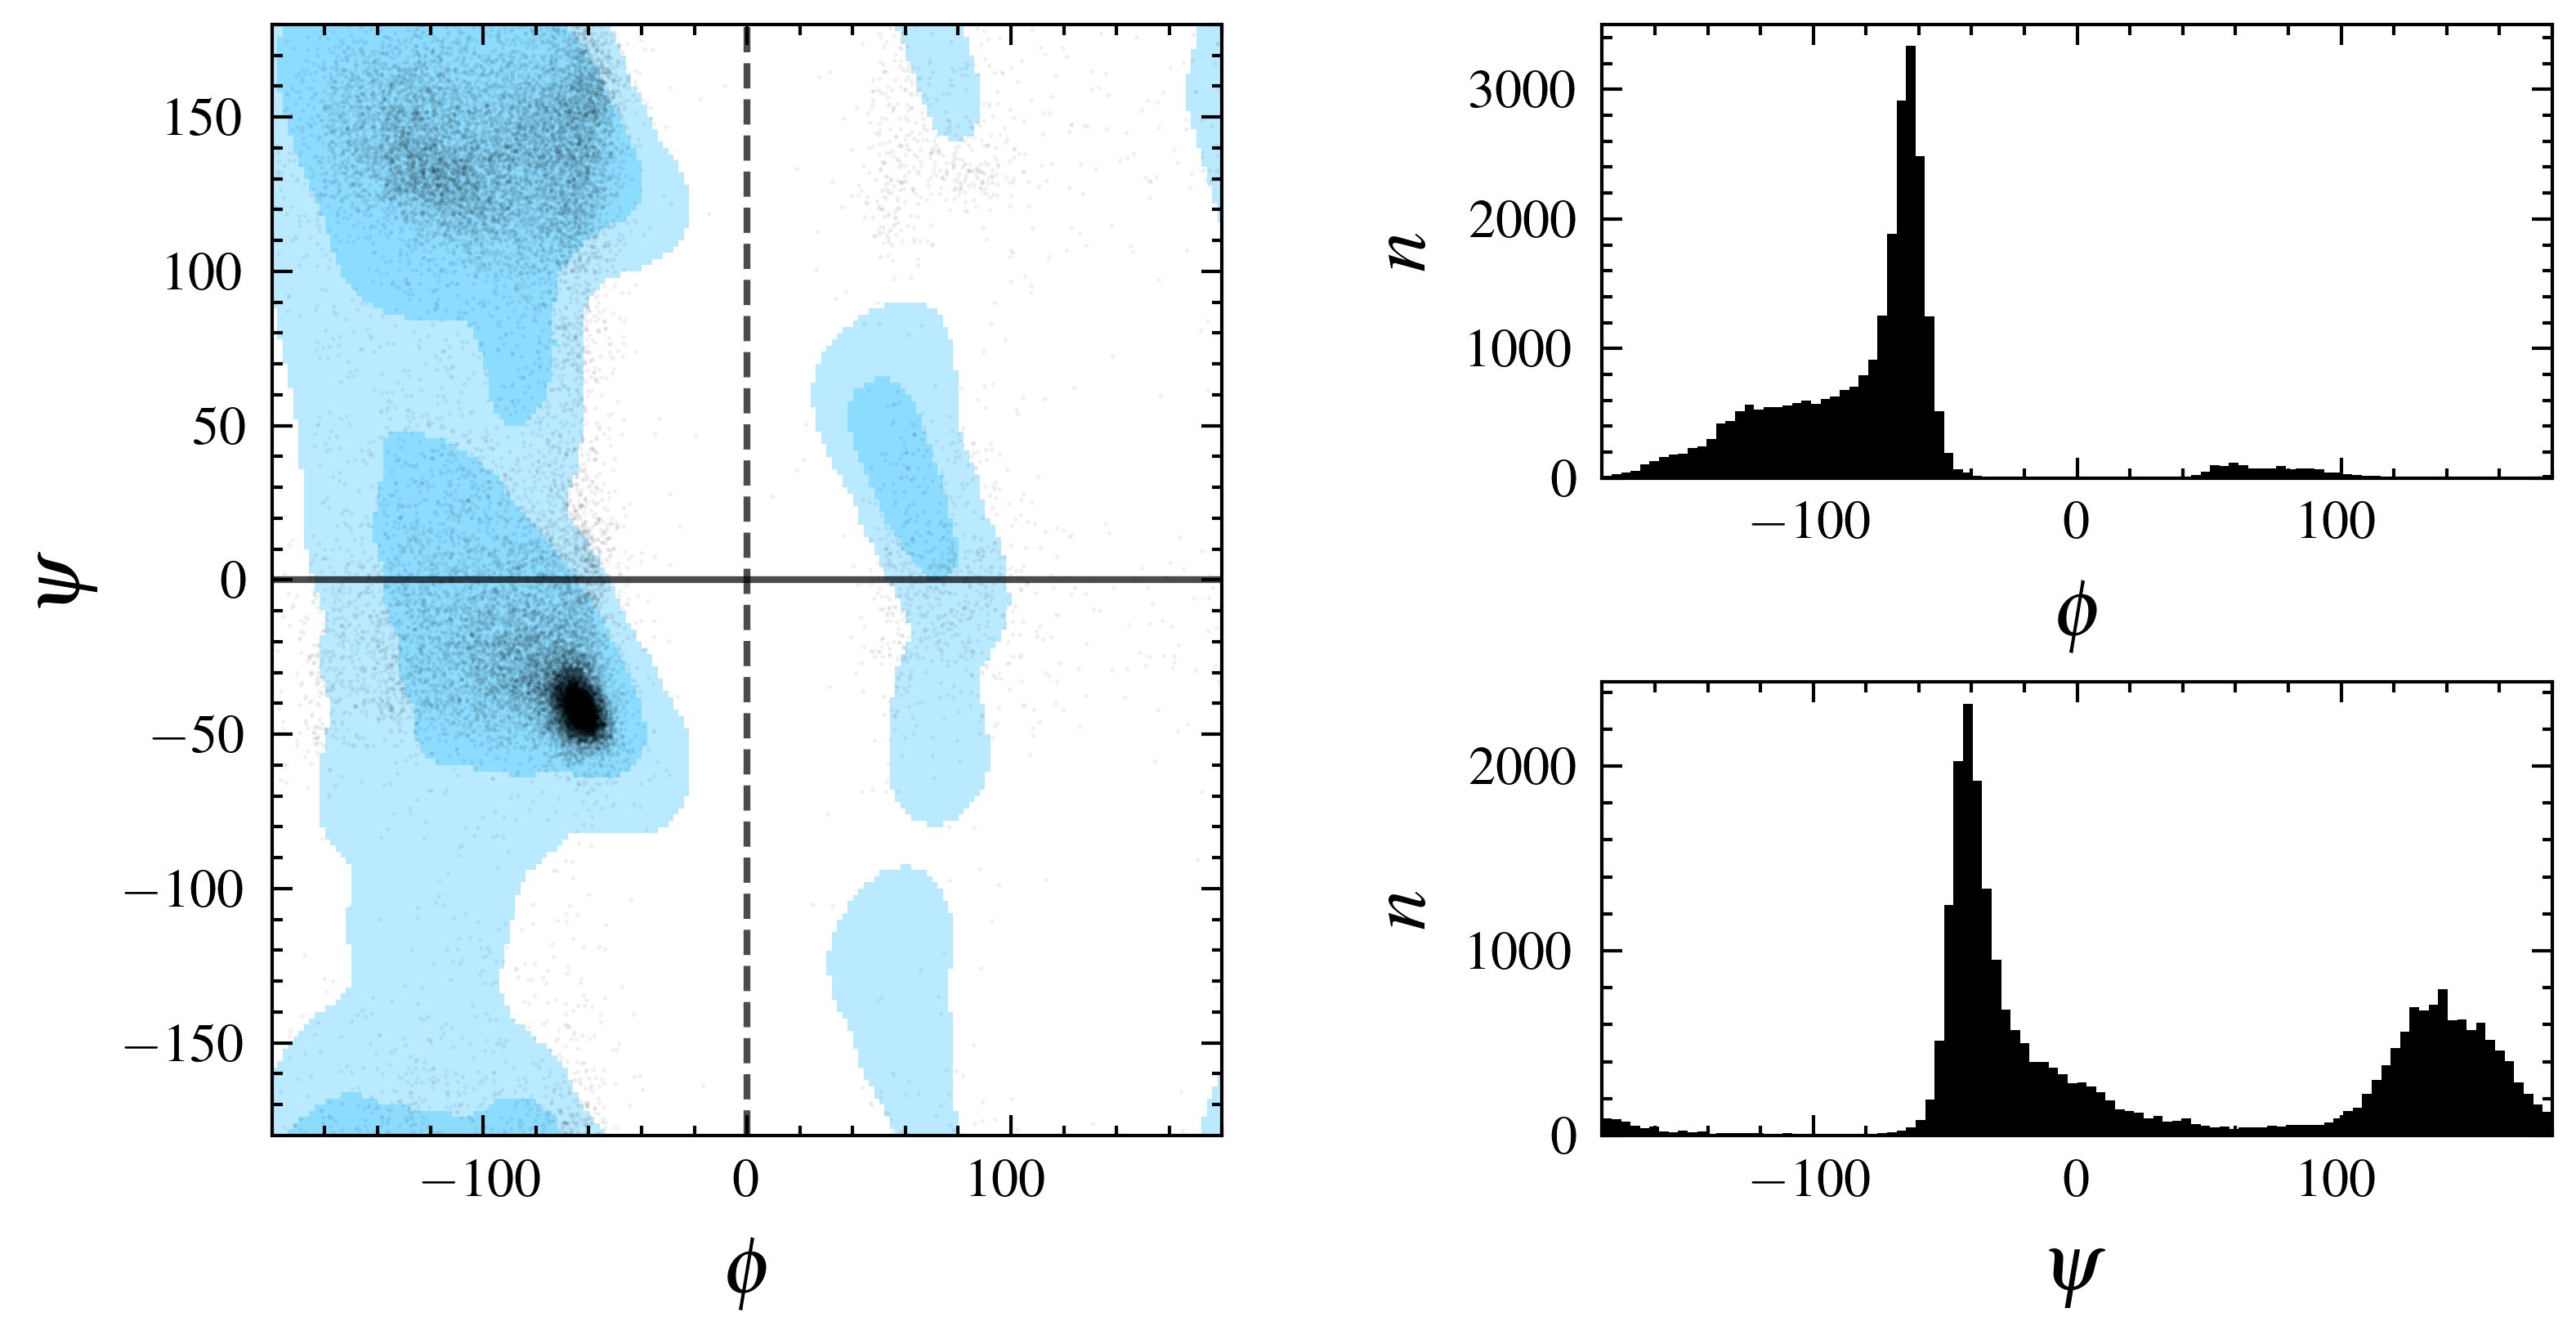

In [311]:
psi_phi_analysis(hhblits, "plots/ramachandran_train")
psi_phi_analysis(casp12, "plots/ramachandran_casp12_train")
psi_phi_analysis(cb513, "plots/ramachandran_cb513_train")
psi_phi_analysis(ts115, "plots/ramachandran_ts115_train")